به نام خدا


---

# آمار و احتمال مهندسی
دانشگاه صنعتی شریف - دانشکده مهندسی کامپیوتر - پاییز ۱۴۰۳

دکتر مطهری

---
## تمرین عملی - فاز ۲


نام و نام خانوادگی: امیرمحمد شربتی 

<div style="direction:rtl; line-height:200%;">
    <font face="XB Zar" size=4>
        <font size=6>
        سؤال ۱: بررسی توزیع‌های احتمالی
        </font>
        <p></p>
        <hr>
        <br/>
        <ol>
            <li>10,000 نمونه از یک توزیع نرمال با میانگین 5 و انحراف معیار 2 تولید کنید.</li>
            <li>هیستوگرام داده‌های تولیدشده را رسم کنید و تابع چگالی احتمال تئوری را روی آن نمایش دهید.</li>
            <li>مقادیر میانگین، واریانس، چولگی (Skewness) و کشیدگی (Kurtosis) نمونه‌ها را محاسبه کنید.</li>
            <li>نتایج به‌دست‌آمده را تفسیر کنید.</li>
        </ol>
    </font>
</div>


Mean: 5.007755 
Variance: 3.957717 
Skewness: -0.01573735 
Kurtosis: 3.031866 


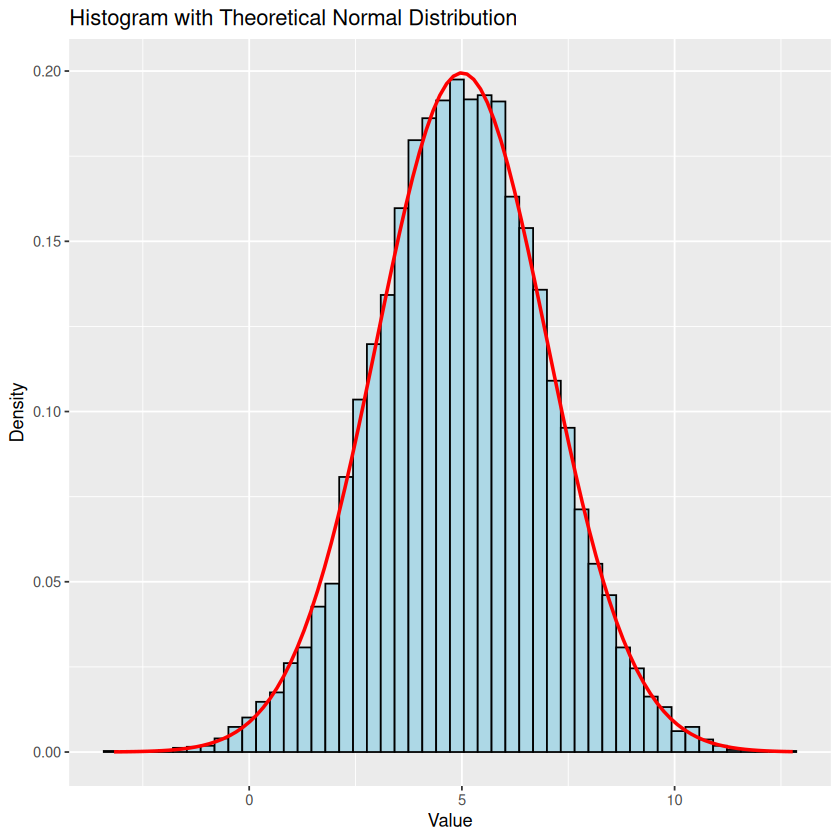

In [38]:
library(ggplot2) # For plotting
library(moments) # A package that helps calculate higher-order moments of a distribution like skewness and kurtosis.

# 1. Generating 10,000 samples from a normal distribution
set.seed(100) # This can be changed or even we can not set it.
n <- 10000
mean_val <- 5
sd_val <- 2
samples <- rnorm(n, mean=mean_val, sd=sd_val)

# 2. Plotting histogram of the samples with the theoretical PDF overlaid
ggplot(data.frame(samples), aes(x=samples)) +
  geom_histogram(aes(y=after_stat(density)), bins=50, fill="lightblue", color="black") +
  stat_function(fun = dnorm, args = list(mean=mean_val, sd=sd_val), color="red", linewidth=1) +
  ggtitle("Histogram with Theoretical Normal Distribution") + xlab("Value") + ylab("Density")

# 3. Calculating mean, variance, skewness, and kurtosis
mean_sample <- mean(samples)
variance_sample <- var(samples)
skewness_sample <- skewness(samples)
kurtosis_sample <- kurtosis(samples)

# Printing the results
cat("Mean:", mean_sample, "\n")
cat("Variance:", variance_sample, "\n")
cat("Skewness:", skewness_sample, "\n")
cat("Kurtosis:", kurtosis_sample, "\n")


<div style="direction:rtl; line-height:200%;">
<font size=3>
همانطور که مشاهده می شود، شاخص های اندازه گیری شده برای مقادیر تولید شده تصادفی (شبه تصادفی) بسیار بسیار به شاخص های اصلی نزدیک هستند. میانگین اصلی 5 است، که با این  $seed$ مشاهده میکنیم که میانگین مقادیر رندوم کمتر از 0.01 با 5 فاصله دارند. همچنین واریانس اصلی و اندازه گیری شده نیز تفاوت خیلی کمی دارند.
    <br/>
    اما دوشاخص دیگر که کشیدگی و چولگی هستند، اطلاعات بیشتر در مورد توزیع در اختیار ما قرار میدهند: چولگی معیاری برای تقارن یا عدم تقارن توزیع احتمال یک متغیر تصادفی میباشد و اگر صفر باشد به معنای تقارن کامل توزیع است. اگر مثبت باشد یعنی سمت راست توزیع طویل تر یا چاق تر است. در اینجا هم مشاهده می کنیم که مقدار اندازه گیری شده به صفر نزدیک است. مورد بعدی کشیدگی است که برای توزیع نرمال سه است. این شاخص هم بسیار به مقدار اندازه گیری شده نزدیک است.
    <br/>
    نتیجه ای که میگیریم این است که چون تعداد مقادیر رندوم تولید شده زیاد است، مقادیر به حد خوبی به توزیع نرمال با همان شاخص های مد نظر می گرایند.
    <br/>
    -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    <br/>
    <br/>
</font>
    <div/>

<div style="direction:rtl; line-height:200%;">
    <font face="XB Zar" size=4>
        <font size=6>
        سؤال ۲: استنتاج بیزی
        </font>
        <p></p>
        <hr>
        <br/>
        <ol>
            <li>فرض کنید توزیع پیشین $P(\theta) \sim Beta(2, 5)$ باشد.</li>
            <li>با توجه به یک تابع درست‌نمایی دوجمله‌ای با $n = 20$ آزمایش و $x = 7$ موفقیت، توزیع پسین را محاسبه کنید.</li>
            <li>توزیع‌های پیشین، درست‌نمایی، و پسین را رسم کنید.</li>
            <li>با استفاده از R، نمونه‌هایی از توزیع پسین شبیه‌سازی کرده و میانگین پسین و بازه اطمینان را تخمین بزنید.</li>
        </ol>
    </font>
</div>



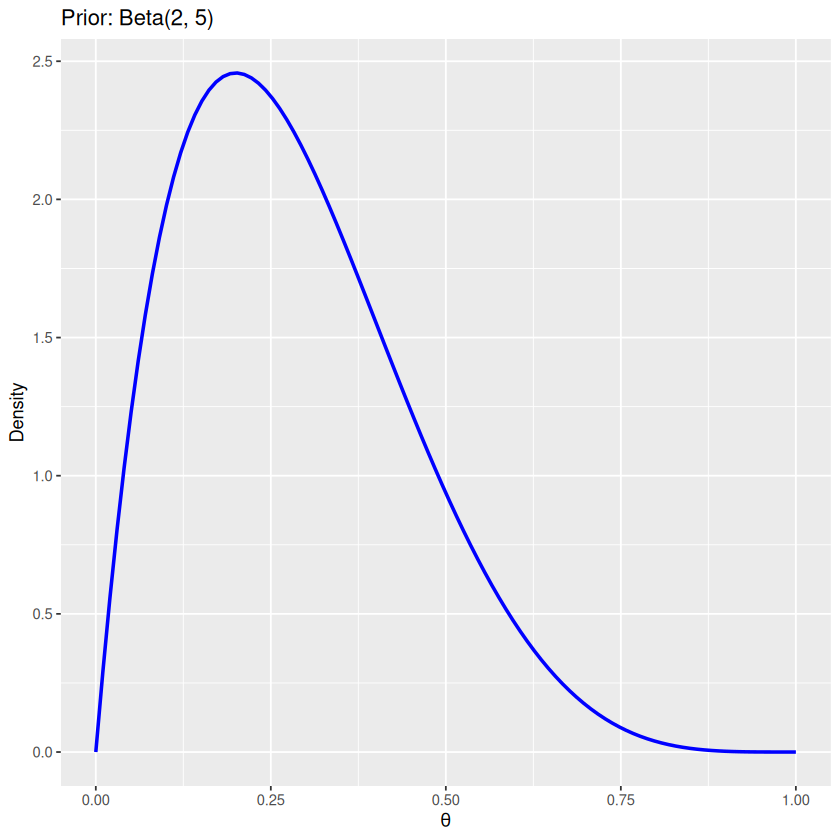

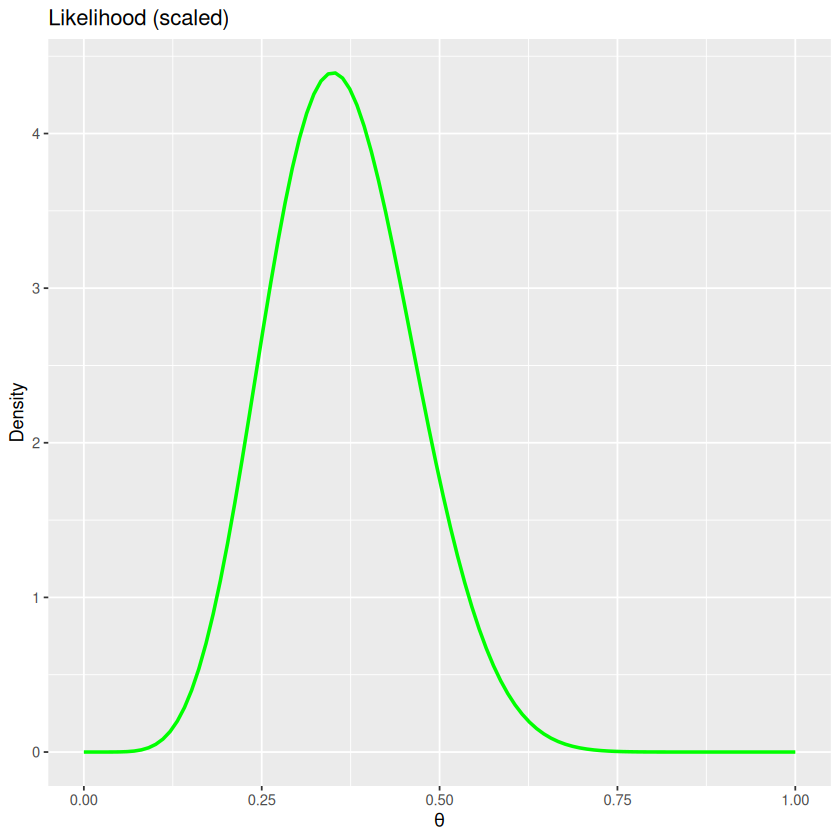

Posterior Mean: 0.3333152 
95% Credible Interval: 0.1695079 0.5161744 


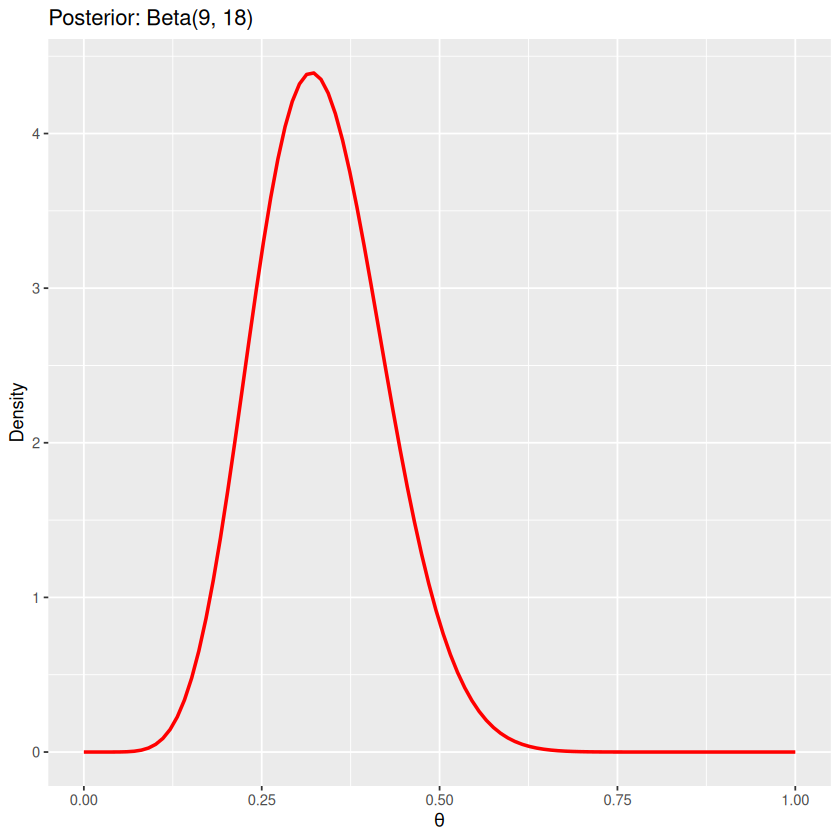

In [47]:
library(ggplot2)  # For plotting

# Defining prior parameters for Beta(2, 5) and Binomial likelihood: n = 20, x = 7
alpha_prior <- 2
beta_prior <- 5
n <- 20
x <- 7

# Generating theta values for plotting (Beta distribution is between 0 and 1).
theta_vals <- seq(0, 1, length.out = 100)

# Calculating the PDF for the prior, likelihood, and posterior
prior_vals <- dbeta(theta_vals, alpha_prior, beta_prior)
likelihood <- dbinom(x, n, theta)

# Posterior distribution: Beta(alpha_post, beta_post)
alpha_post <- alpha_prior + x
beta_post <- beta_prior + (n - x)
posterior_vals <- dbeta(theta_vals, alpha_post, beta_post)

# Plot the prior, likelihood, and posterior
ggplot(data.frame(theta=theta_vals, prior=prior_vals), aes(x=theta, y=prior)) +
  geom_line(color="blue", size=1) +
  ggtitle("Prior: Beta(2, 5)") +
  xlab(expression(theta)) + ylab("Density")

ggplot(data.frame(theta, likelihood_norm), aes(x=theta, y=likelihood_norm)) +
  geom_line(color="green", size=1) +
  ggtitle("Likelihood (scaled)") +
  xlab(expression(theta)) + ylab("Density")

ggplot(data.frame(theta=theta_vals, posterior=posterior_vals), aes(x=theta, y=posterior)) +
  geom_line(color="red", size=1) +
  ggtitle("Posterior: Beta(9, 18)") +
  xlab(expression(theta)) + ylab("Density")

# Simulating samples from the posterior distribution
set.seed(123)  # For reproducibility
posterior_samples <- rbeta(10000, alpha_post, beta_post)

# Calculating posterior mean and credible interval (95% confidence)
posterior_mean <- mean(posterior_samples)
credible_interval <- quantile(posterior_samples, c(0.025, 0.975))

cat("Posterior Mean:", posterior_mean, "\n")
cat("95% Credible Interval:", credible_interval, "\n")

<div style="direction:rtl; line-height:200%;">
    <font face="XB Zar" size=4>
        <font size=6>
        معرفی مختصر مدل‌های ترکیبی گوسی (GMM)
        </font>
        <p></p>
        <hr>
        <br/>
        مدل‌های ترکیبی گوسی (Gaussian Mixture Models - GMM) مدل‌هایی احتمالی هستند که برای نمایش داده‌هایی استفاده می‌شوند که ممکن است از ترکیب چند توزیع گوسی تشکیل شده باشند. هر مؤلفه گوسی در این ترکیب با میانگین ($\mu$)، واریانس ($\sigma^2$) و وزن ($\pi$) تعریف می‌شود که نشان‌دهنده نسبت داده‌های متعلق به آن مؤلفه است.  
        <br/><br/>
        تابع چگالی احتمال یک GMM به شکل زیر است:  
        $$p(x) = \sum_{k=1}^{K} \pi_k \cdot \mathcal{N}(x | \mu_k, \sigma_k^2),$$  
        که در آن $K$ تعداد مؤلفه‌ها، $\pi_k$ وزن‌ها ($\sum \pi_k = 1$) و $\mathcal{N}(x | \mu_k, \sigma_k^2)$ تابع چگالی گوسی برای مؤلفه $k$ است.  
        <br/>
        مدل‌های ترکیبی گوسی به خصوص برای خوشه‌بندی و تخمین چگالی مفید هستند و در کاربردهایی مانند بخش‌بندی تصویر و تشخیص گفتار استفاده می‌شوند.  
    </font>
</div>

<div style="direction:rtl; line-height:200%;">
    <font face="XB Zar" size=4>
        <font size=6>
        سؤال ۳: بخش‌بندی تصویر با استفاده از GMM
        </font>
        <p></p>
        <hr>
        <br/>
        <ol>
            <li>داده‌های مجموعه‌ی <code>volcano</code> در R را که نشان‌دهنده داده‌های ارتفاعی است بارگذاری کنید. داده‌ها را به بازه $[0, 1]$ نرمال کنید.</li>
            <li>از مدل ترکیبی گوسی (GMM) برای بخش‌بندی این مجموعه به سه ناحیه متمایز استفاده کنید. مدل را با استفاده از بسته‌ی <code>mclust</code> در R یا کتابخانه‌ای مشابه برازش دهید.</li>
            <li>تصویر بخش‌بندی‌شده را با اختصاص هر پیکسل به مؤلفه گوسی با بیشترین احتمال نمایش دهید.</li>
            <li>نواحی بخش‌بندی‌شده را تفسیر کنید و بحث کنید که GMM چقدر ساختار داده را به خوبی مدل‌سازی کرده است.</li>
        </ol>
    </font>
</div>



---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust V (univariate, unequal variance) model with 3 components: 

 log-likelihood    n df      BIC       ICL
        516.701 5307  8 964.7877 -1239.391

Clustering table:
   1    2    3 
1777 1567 1963 

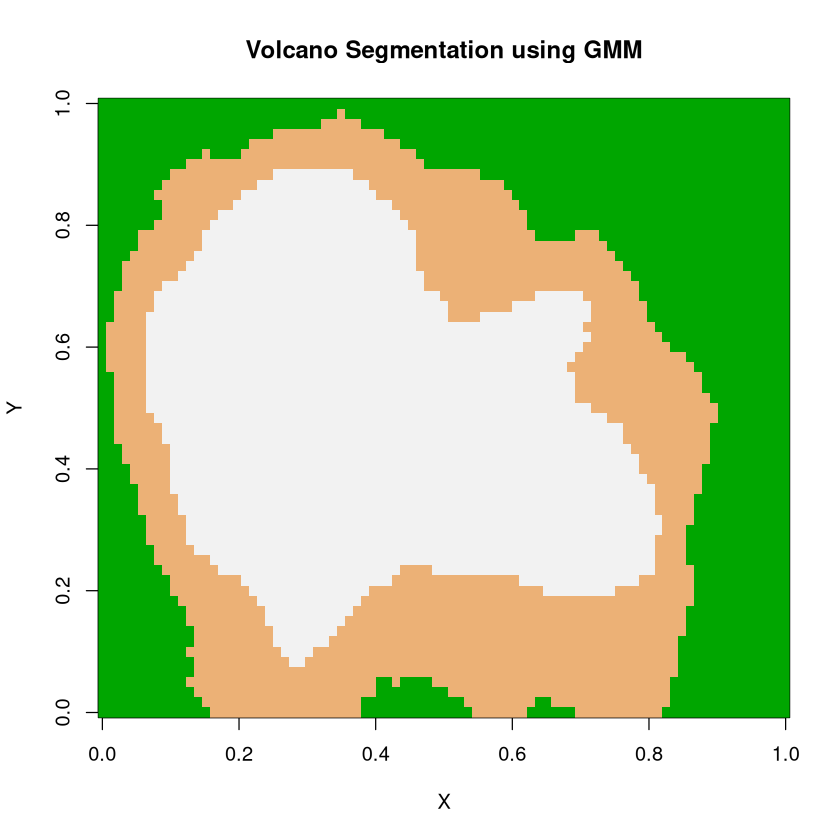

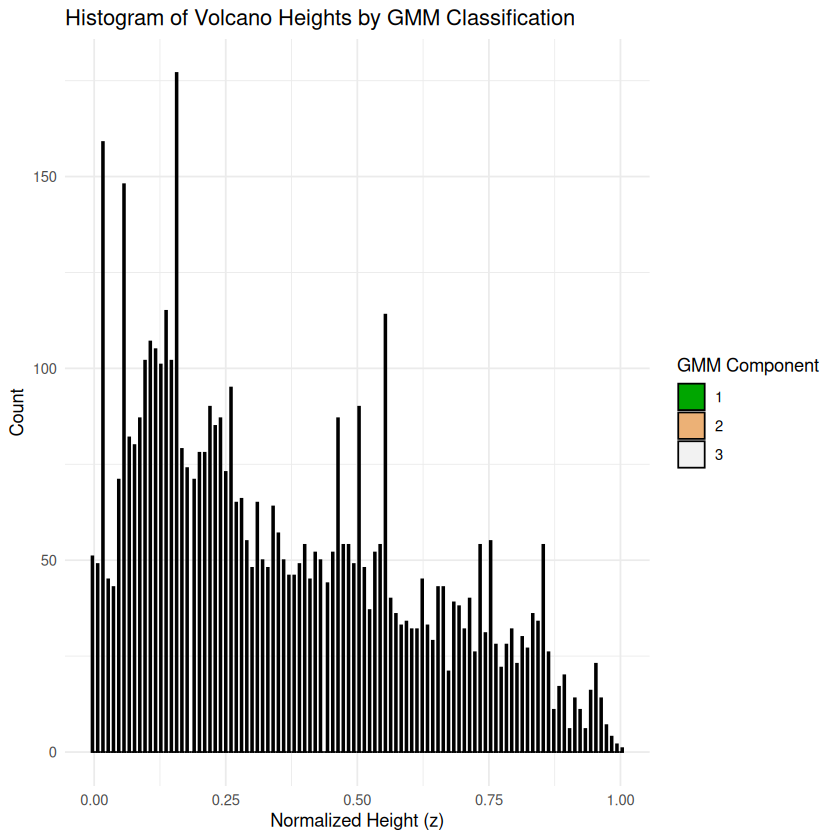

In [143]:
library(mclust)
library(ggplot2)
library(reshape2)

# Loading the volcano dataset (this is a matrix)
data(volcano)
volcano_data <- as.matrix(volcano)

# Normalizing data to the range [0, 1]
volcano_normalized <- (volcano_data - min(volcano_data)) / (max(volcano_data) - min(volcano_data))

# Preparing the data for GMM (reshaping the matrix into a long format for fitting)
volcano_long <- as.data.frame(as.table(volcano_normalized))
colnames(volcano_long) <- c("x", "y", "z")

# Fitting GMM to the normalized height data (z) and classify into 3 regions
gmm_model <- Mclust(volcano_long$z, G = 3)  # G = 3 means 3 components

# Adding the classification result to the data
volcano_long$classification <- gmm_model$classification

# Reshaping the classification back into matrix form for plotting
volcano_classified <- matrix(gmm_model$classification, nrow = nrow(volcano_data), ncol = ncol(volcano_data))

# Plotting the segmented volcano data (each region colored based on the GMM component)
image(volcano_classified, col = terrain.colors(3), main = "Volcano Segmentation using GMM", xlab = "X", ylab = "Y")

# Printing model summary
summary(gmm_model)

# Visualizing the Gaussian components for each region
ggplot(volcano_long, aes(x = z, fill = as.factor(classification))) +
  geom_histogram(binwidth = 0.01, position = "dodge", color = "black") +
  ggtitle("Histogram of Volcano Heights by GMM Classification") +
  xlab("Normalized Height (z)") + ylab("Count") +
  scale_fill_manual(values = terrain.colors(3), name = "GMM Component") + theme_minimal()

<div style="direction:rtl; line-height:200%;">
<font size=3>
پس از اعمال مدل $GMM$ بر داده‌های ارتفاعی $volcano$، مدل داده‌ها را به سه ناحیه مختلف (سه مؤلفه گوسی) بخش‌بندی کرده است. هر یک از این نواحی نماینده محدوده‌ای از مقادیر ارتفاعی مشابه در داده‌ها هستند: نقاط با ارتفاع کم، متوسط و زیاد.
    <br/>
مدل $GMM$ به عنوان یک مدل احتمالاتی برای داده‌هایی که دارای توزیع‌های چندگانه هستند، عملکرد خوبی دارد.
    $GMM$ به دلیل انعطاف‌پذیری در مدل‌سازی داده‌هایی که به چند گروه طبیعی تقسیم می‌شوند، عملکرد خوبی نشان می‌دهد. در اینجا، داده‌های ارتفاعی به‌طور منطقی می‌توانند به چندین مؤلفه تقسیم شوند (ارتفاعات پایین، متوسط و بالا). $GMM$ این ساختار را با استفاده از ترکیبی از توزیع‌های نرمال برازش داده است.
    <br/>
    یکی از ویژگی‌های GMM این است که هر نقطه داده به‌صورت احتمالاتی به یک مؤلفه اختصاص داده می‌شود. بنابراین، مناطقی از تصویر که به‌وضوح به یک مؤلفه خاص تعلق دارند، به‌راحتی مشخص می‌شوند. همچنین، مناطقی که ممکن است در مرزهای بین مؤلفه‌ها باشند، احتمالاً با نوساناتی در بخش‌بندی نمایش داده می‌شوند.
    <br/> 
     اگرچه GMM ساختار کلی داده را به‌خوبی تشخیص می‌دهد، ممکن است در برخی موارد محدودیت‌هایی داشته باشد. داده‌های volcano دارای پیچیدگی‌هایی مانند شیب‌های غیرخطی هستند که ممکن است کاملاً با توزیع‌های نرمال مدل‌سازی نشوند. در این صورت، ممکن است مدل نتواند تمام جزئیات ظریف داده‌ها را به‌خوبی نشان دهد.
    <br/>
    GMM به‌خوبی توانسته است داده‌های volcano را به سه ناحیه متمایز تقسیم کند و ساختار کلی ارتفاعی را مدل‌سازی کند. نواحی پایین، متوسط و بالای ارتفاعی به‌خوبی تشخیص داده شده‌اند. با این حال، در مناطق مرزی ممکن است مدل‌سازی با اندکی عدم قطعیت همراه باشد. در مجموع، GMM ابزار مناسبی برای این نوع داده‌ها است، اما برای مدل‌سازی دقیق‌تر، روش‌های پیچیده‌تری ممکن است لازم باشند.
    <br/>
                          -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    <br/>
    <br/>
</font>
    <div/>

<div style="direction:rtl; line-height:200%;">  
<font face="XB Zar" size=4>  
<font size=6>استنتاج بیزی در تصمیم‌گیری</font>  
<p></p>  
<hr>  
<br/>  
استنتاج بیزی ابزاری قدرتمند برای تصمیم‌گیری در شرایط عدم قطعیت است. این سؤال شما را با روش‌های بیزی برای تحلیل یک مجموعه داده واقعی شبیه‌سازی‌شده آشنا می‌کند و به شما امکان می‌دهد احتمال‌های پسین را محاسبه کرده و تأثیر اطلاعات جدید بر باورهای اولیه را ارزیابی کنید.  
<br/><br/>  
<b>مجموعه داده:</b> از مجموعه داده شبیه‌سازی‌شده «Fault Detection Dataset» استفاده کنید. این مجموعه داده شامل اطلاعات زیر است:  
<ul>  
<li><b>Alarm:</b> فعال یا غیرفعال (هشدار سیستم)</li>  
<li><b>True_Status:</b> خرابی واقعی (خرابی وجود دارد) یا عدم خرابی (خرابی وجود ندارد)</li>  
<li><b>Machine_Age:</b> جدید، متوسط، قدیمی</li>  
<li><b>Maintenance_History:</b> اخیراً تعمیر شده، نیاز به تعمیر، بدون تعمیر</li>  
</ul>  
</font>  
</div>  

<div style="direction:rtl; line-height:200%;">  
<font face="XB Zar" size=4>  
<font size=6>سؤال ۴: تحلیل بیزی هشدار سیستم</font>  
<p></p>  
<hr>  
<br/>  
<ol>  
<li>مجموعه داده را در R بارگذاری کرده و داده‌ها را خلاصه کنید. نرخ وقوع خرابی (Prior Probability) را محاسبه کنید.</li>  
<li>نرخ هشدار درست (True Positive Rate) و نرخ هشدار اشتباه (False Positive Rate) سیستم را محاسبه کنید.</li>  
<li>با استفاده از قضیه بیز، احتمال پسین خرابی را برای یک هشدار فعال محاسبه کنید:  
<br/>  
$$P(\text{Fault | Alarm}) = \frac{P(\text{Alarm | Fault}) \cdot P(\text{Fault})}{P(\text{Alarm})}.$$  
</li>  
<li>احتمال پسین عدم خرابی را برای یک هشدار غیرفعال محاسبه کنید.</li>  
<li>با شبیه‌سازی نرخ‌های اولیه مختلف برای وقوع خرابی (مثلاً ۱٪، ۱۰٪ و ۵۰٪)، احتمال‌های پسین را مجدداً محاسبه کرده و اثر تغییر در احتمال اولیه را بررسی کنید.</li>  
<li>یک تحلیل زیرگروه بر اساس <code>Machine_Age</code> یا <code>Maintenance_History</code> انجام دهید. احتمال‌های پسین را برای هر زیرگروه محاسبه کرده و نتایج را مقایسه کنید.</li>  
<li>یافته‌های خود را خلاصه کرده و درباره پیامدهای هشدارهای کاذب و از دست دادن هشدارهای واقعی بحث کنید. توضیح دهید که چگونه احتمال اولیه قوی می‌تواند نتایج تحلیل را تحت تأثیر قرار دهد.</li>  
</ol>  
</font>  
</div>


In [2]:
# Load necessary libraries
library(dplyr)    # for data manipulation
library(ggplot2)  # for plotting
library(readr)    # for reading CSV files

# Load the dataset
data <- read_csv("simulated_fault_dataset.csv", show_col_types = FALSE)


# Overview of data after cleaning
cat("Summary of the dataset:\n")
cat("Number of rows without duplicate is ", nrow(data), "\n")
summary(data)
print(table(data$Machine_Age))
print(table(data$Maintenance_History))
print(table(data$True_Status))
print(table(data$Alarm))

# Calculating prior probabolity: 
fault_count <- sum(data$True_Status == "Fault") # Count of Faults
prior_fault <- fault_count / nrow(data)
cat("Prior Probability (P(Fault)) =", prior_fault, "\n")


# TPR: P(Alarm = Active | Fault)
fault_data <- data %>% filter(True_Status == "Fault")
TPR <- sum(fault_data$Alarm == "Active") / nrow(fault_data)
cat("True Positive Rate (TPR) =", TPR, "\n")

# FPR: P(Alarm = Active | No Fault)
no_fault_data <- data %>% filter(True_Status == "No Fault")
FPR <- sum(no_fault_data$Alarm == "Active") / nrow(no_fault_data)
cat("False Positive Rate (FPR) =", FPR, "\n")

# Overall rate of Active alarms
P_alarm_active <- sum(data$Alarm == "Active") / nrow(data)
# Posterior probability of fault given an active alarm
posterior_fault_given_active <- (TPR * prior_fault) / P_alarm_active
cat("Posterior P(Fault | Active Alarm) =", posterior_fault_given_active, "\n")

P_alarm_inactive <- 1 - P_alarm_active
prior_no_fault <- 1 - prior_fault
posterior_no_fault_given_inactive <- ((1 - FPR) * prior_no_fault) / P_alarm_inactive
cat("Posterior P(No Fault | Inactive Alarm) =", posterior_no_fault_given_inactive, "\n")

simulate_posterior <- function(prior_fault_sim, TPR, P_alarm_active_sim) {
  posterior <- (TPR * prior_fault_sim) / P_alarm_active_sim
  return(posterior)
}
# For simulation purposes, we assume P(Alarm=Active) is constant (as computed before)
priors <- c(0.01, 0.10, 0.50)
posterior_results <- sapply(priors, function(p) simulate_posterior(p, TPR, P_alarm_active))
names(posterior_results) <- paste0("Prior=", priors)
print(posterior_results)

# Compute subgroup summaries for each Machine_Age
subgroup_summary <- data %>% group_by(Machine_Age) %>% summarise(
    total = n(),
    fault_count = sum(True_Status == "Fault"),
    TPR = sum(True_Status == "Fault" & Alarm == "Active") / sum(True_Status == "Fault"),
    posterior_fault_given_active = (TPR * (fault_count / total)) / (sum(Alarm == "Active") / total)
  )
print(subgroup_summary)


Summary of the dataset:
Number of rows without duplicate is  10000 


 Machine_Age        Maintenance_History True_Status           Alarm          
 Length:10000       Length:10000        Length:10000       Length:10000      
 Class :character   Class :character    Class :character   Class :character  
 Mode  :character   Mode  :character    Mode  :character   Mode  :character  


 Mid  New  Old 
3974 4077 1949 

     Needs Repair    No Maintenance Recently Repaired 
             3567              2207              4226 

   Fault No Fault 
    1562     8438 

  Active Inactive 
    1804     8196 
Prior Probability (P(Fault)) = 0.1562 
True Positive Rate (TPR) = 0.8886044 
False Positive Rate (FPR) = 0.04930078 
Posterior P(Fault | Active Alarm) = 0.7694013 
Posterior P(No Fault | Inactive Alarm) = 0.9787701 
Prior=0.01  Prior=0.1  Prior=0.5 
0.04925745 0.49257448 2.46287238 
# A tibble: 3 × 5
  Machine_Age total fault_count   TPR posterior_fault_given_active
  <chr>       <int>       <int> <dbl>                        <dbl>
1 Mid          3974         578 0.910                        0.765
2 New          4077         129 0.868                        0.360
3 Old          1949         855 0.877                        0.932


<div style="direction:rtl; line-height:200%;">
<font size=3>
در این سوال به قضیه بیز و کاربرد آن پرداختیم. بر اساس احتمالات پیشین و تخمین ما از انها، سعی میکنیم احتمالات مد نظر را حساب کنیم. بر اساس احتمال کل خرابی و احتمال کل هشدار، و همچنین احتمال شرطی هشدار به شرط خرابی، سعی کردیم احتمال خرابی به شرط هسدار را حساب کنیم. یعنی سعی کردیم بررسی کنیم که با چه احتمالی هشدار داده شده درست است. همچنین به بررسی احتمالات دیگری هم مثل عدم خرابی به شرط عدم هشدار پرداختیم. بررسی کردیم که تا چه میزان این سیستم درست کار میکند و چقدر باید به هشدار اطمینان داشت. 
    <br/>
در اینجا میبینیم که اگر سه احتمالی که در قضیه بیز استفاده میکنیم تا احتمال مطلوب را حساب کنیم دچار مشکل شوند، مثلا نرخ خرابی را در قسمت 5 تغییر دادیم، چه اتفاقی برای احتمال شرطی نهایی رخ میدهد. یا اگر  سیستم هشدار های کاذب ذهذ، احتمالی که در مخرج وجود دارد بیشتر میشود، در حالی که احتمال هشدار به شرط خرابی تغییر چندانی نمیکند. (چون هشدار کاذب بیشتر شده، نه مجموع هشدار های درست و غلط). پس نرخ اطمینان ما به سیستم کاهش می یابد. یعنی هشدار های اشتباهی میبینیم که درست نیست. در حالی رخ داده که سیستم سالم بوده، ولی هشدار مبینیم که کذب است.
    <br/>
خلاصه که احتمالات اولیه قوی تر و درست تر، منجر به احتمالات نهایی درست تر میشوند. در این صورت بیشتر میتوان به سیستم هشدار برای خرابی اطمینان کرد، زیرا بهتر و دقیق تر هشدار میدهد و این باعث افزایش احتمال هشدار به شرط خرابی یا عدم هشدار به شرط عدم خرابی میشود که مطلوب ما است.
                          -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    <br/>
    <br/>
</font>
    <div/>

<div style="direction:rtl; line-height:200%;">  
<font face="XB Zar" size=4>  
<font size=6>مقایسه میانگین گروه‌ها با آزمون t: تحلیل نمرات آزمون</font>  
<p></p>  
<hr>  
<br/>  
آزمون‌های آماری مانند آزمون t برای تعیین تفاوت معنادار بین میانگین‌های دو گروه استفاده می‌شوند. در این سؤال، شما از آزمون t برای تحلیل نمرات آزمون دو گروه از دانش‌آموزان استفاده خواهید کرد.  
<br/><br/>  
<b>مجموعه داده:</b> از یک مجموعه داده شبیه‌سازی‌شده یا داده‌ای که شامل اطلاعات زیر باشد استفاده کنید:  
<ul>  
<li><b>Student ID:</b> شناسه دانش‌آموز</li>  
<li><b>Group:</b> کلاس آنلاین یا کلاس حضوری</li>  
<li><b>Score:</b> نمره آزمون</li>  
</ul>  
</font>  
</div>  

<div style="direction:rtl; line-height:200%;">  
<font face="XB Zar" size=4>  
<font size=6>سؤال ۵: تحلیل تأثیر روش تدریس بر نمرات آزمون</font>  
<p></p>  
<hr>  
<br/>  
<ol>  
<li><b>کاوش داده‌ها:</b>  
   <ul>  
     <li>مجموعه داده را در R بارگذاری کرده و آمار توصیفی نمرات هر گروه (میانگین، انحراف معیار و ...) را محاسبه کنید.</li>  
     <li>توزیع نمرات برای هر دو گروه را با استفاده از نمودار جعبه‌ای (Boxplot) بصری‌سازی کنید.</li>  
   </ul>  
</li>  
<li><b>اجرای آزمون t:</b>  
   <ul>  
     <li>یک آزمون t مستقل دو نمونه‌ای انجام دهید تا مشخص شود آیا تفاوت معناداری بین میانگین نمرات دو گروه وجود دارد یا خیر.</li>  
     <li>فرضیه‌ها را به این صورت تعریف کنید:  
       <ul>  
         <li><b>فرض صفر (H<sub>0</sub>):</b> میانگین نمرات دو گروه برابر است.</li>  
         <li><b>فرض مقابل (H<sub>1</sub>):</b> میانگین نمرات دو گروه برابر نیست.</li>  
       </ul>  
     </li>  
   </ul>  
</li>  
<li><b>تفسیر نتایج:</b>  
   <ul>  
     <li>آماره t، درجه آزادی (Degrees of Freedom) و مقدار p را گزارش کنید.</li>  
     <li>بر اساس مقدار p، مشخص کنید که در سطح معناداری ۵٪، فرض صفر رد می‌شود یا خیر.</li>  
   </ul>  
</li>  
<li><b>اندازه اثر (امتیازی):</b>  
   <ul>  
     <li>شاخص اندازه اثر کوهن (Cohen's d) را برای اندازه‌گیری میزان تفاوت بین دو گروه محاسبه کنید.</li>  
   </ul>  
</li>  
<li><b>بحث و نتیجه‌گیری:</b>  
   <ul>  
     <li>یافته‌های خود را خلاصه کنید.</li>  
     <li>توضیح دهید که آیا روش تدریس (آنلاین در مقابل حضوری) تأثیر معناداری بر نمرات آزمون داشته است یا خیر.</li>  
     <li>به محدودیت‌های احتمالی این تحلیل اشاره کنید (مانند اندازه نمونه، عوامل مداخله‌گر دیگر).</li>  
   </ul>  
</li>  
</ol>  
</font>  
</div>  

,Student_ID,Group,Score
,<int>,<chr>,<dbl>
1,1,Online,52.41453
2,2,Online,64.73694
3,3,Online,59.96741
4,4,Online,69.75836
5,5,Online,65.61926
6,6,Online,57.45714


# A tibble: 2 × 6
  Group      Mean    SD   Min   Max Median
  <chr>     <dbl> <dbl> <dbl> <dbl>  <dbl>
1 In-person  72.0  8.67  48.0  90.9   72.0
2 Online     61.6  9.48  29.2  77.1   62.1
-------------------------------------------------------------------
t-statistic: 5.514803 
Degrees of Freedom: 78.46903 
p-value: 4.322651e-07 
The null hypothesis is rejected. There is a significant difference between the two groups. 
Cohen's d: 1.088125 


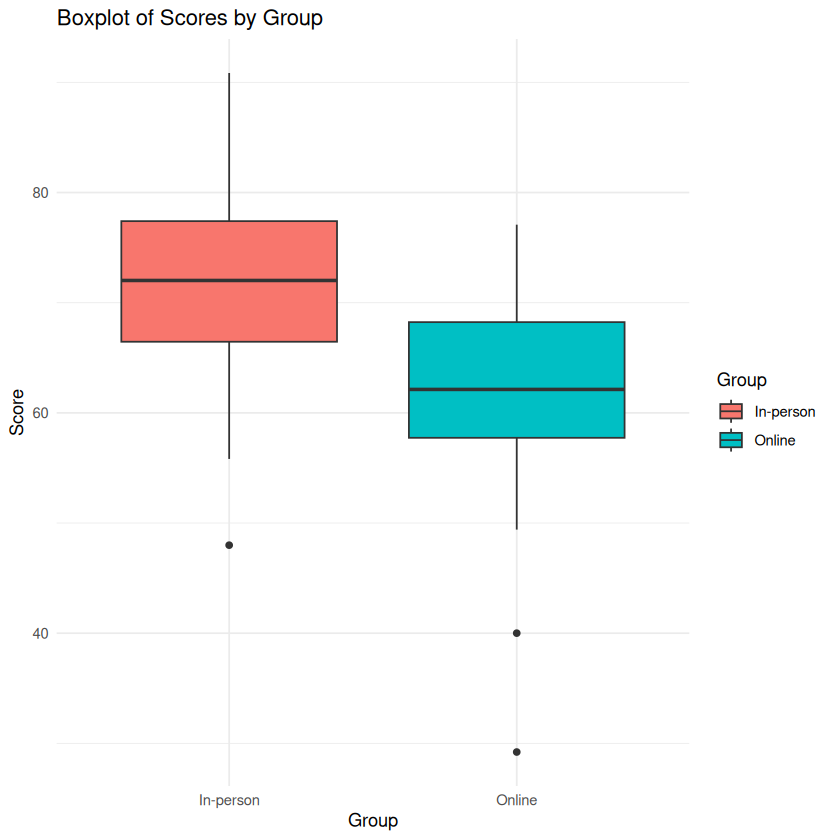

In [62]:
library(dplyr)
library(ggplot2)

data <- data.frame(
  Student_ID = 1:100,  # Assume we have 100 students
  Group = c(rep("Online", 40), rep("In-person", 60)),  # We have two groups of students
  Score = c(rnorm(40, mean = 65, sd = 10), rnorm(60, mean = 70, sd = 10)) 
)
head(data)

summary_stats <- data %>% group_by(Group) %>% summarise(
    Mean = mean(Score),
    SD = sd(Score),
    Min = min(Score),
    Max = max(Score),
    Median = median(Score)
  )
print(summary_stats)

# Creating boxplot
ggplot(data, aes(x = Group, y = Score, fill = Group)) +
  geom_boxplot() +
  ggtitle("Boxplot of Scores by Group") +
  xlab("Group") + ylab("Score") +
  theme_minimal()

# t test: (we can set var.equal = FALSE, means vars aren't equal)
t_test_result <- t.test(Score ~ Group, data = data)  
# we can also do this: print(t_test_result)

t_statistic <- t_test_result$statistic
degrees_freedom <- t_test_result$parameter
p_value <- t_test_result$p.value

cat("-------------------------------------------------------------------\n")
cat("t-statistic:", t_statistic, "\n")
cat("Degrees of Freedom:", degrees_freedom, "\n")
cat("p-value:", p_value, "\n")

# Is H0 correct or H1?
if (p_value < 0.05) {
  cat("The null hypothesis is rejected. There is a significant difference between the two groups. \n")
} else {
  cat("The null hypothesis is not rejected. There is no significant difference between the two groups.\n")
}

# Cohen's d = difference of means should be divided by the sd of the two samples (sds are equal, as stated in quera)
mean_online <- mean(data$Score[data$Group == "Online"])
mean_inperson <- mean(data$Score[data$Group == "In-person"])
SD <- sd(data$Score[data$Group == "Online"])

cohens_d <- (mean_inperson - mean_online) / SD
cat("Cohen's d:", cohens_d, "\n")


<div style="direction:rtl; line-height:200%;">
<font size=3>
پس از اجرای آزمون t و محاسبه مقدار p، می‌توانیم نتیجه‌گیری کنیم که آیا تفاوت معناداری بین میانگین نمرات دو گروه وجود دارد یا خیر. اگر مقدار p کمتر از ۵٪ (۰.۰۵) باشد، فرض صفر (H0) که بیان می‌کرد میانگین نمرات دو گروه برابر است، رد می‌شود و می‌توان نتیجه گرفت که روش تدریس (آنلاین یا حضوری) بر نمرات تأثیر معناداری داشته است.
    <br/>
    اندازه اثر نشان می‌دهد میزان تفاوت بین دو گروه چقدر بزرگ است، فارغ از اینکه آیا این تفاوت از نظر آماری معنادار است یا خیر. در واقع، Cohen's d اندازه تفاوت میانگین نمرات دو گروه را نسبت به انحراف معیار مشترک آنها می‌سنجد.
    <br/>
     اگر آزمون t نشان دهد که تفاوت معناداری بین میانگین نمرات دو گروه وجود دارد (با رد فرض صفر)، این بدان معناست که روش تدریس (آنلاین یا حضوری) بر نمرات دانش‌آموزان تأثیرگذار بوده است. اگر فرض صفر رد نشود، نشان می‌دهد که تفاوت میانگین نمرات دو گروه ممکن است تصادفی باشد و روش تدریس تأثیر معناداری نداشته است.
    <br/>
 اگر اندازه نمونه کوچک باشد (مثلاً تعداد کمی دانش‌آموز در هر گروه)، نتیجه تحلیل ممکن است قابلیت تعمیم کمتری داشته باشد. افزایش اندازه نمونه معمولاً باعث دقت بیشتر نتایج می‌شود.
    <br/>
    عوامل مداخله‌گر: ممکن است عوامل دیگری مانند سطح قبلی دانش‌آموزان، وضعیت اقتصادی-اجتماعی، یا محیط آموزشی بر نمرات تأثیر داشته باشند که در این تحلیل در نظر گرفته نشده‌اند. این عوامل ممکن است باعث نتایج نادرست شوند.
    <br/> -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    <br/>
    <br/>
</font>
    <div/>

<div style="direction:rtl; line-height:200%;">  
<font face="XB Zar" size=4>  
<font size=6>شبیه‌سازی حرکت تصادفی: تحلیل و رسم مسیر</font>  
<p></p>  
<hr>  
<br/>  
<b>حرکت تصادفی (Random Walk)</b> مدلی ریاضی است که مسیرهایی را توصیف می‌کند که در آن هر گام به صورت تصادفی برداشته می‌شود. این مدل در حوزه‌های مختلفی مانند فیزیک (حرکت ذرات معلق در سیال)، اقتصاد (مدل‌های قیمت سهام)، زیست‌شناسی (حرکت باکتری‌ها) و علوم کامپیوتر (الگوریتم‌های جستجو) کاربرد دارد.  
<br/><br/>  
<b>مثال‌ها:</b>  
<ul>  
<li>حرکت تصادفی ذرات در محیط مایع (جنبش براونی).</li>  
<li>پیش‌بینی مسیرهای احتمالی در بازار سهام.</li>  
<li>الگوهای جستجوی حیوانات برای غذا.</li>  
</ul>  
<br/>  
در این سؤال، یک حرکت تصادفی در فضای دوبعدی را شبیه‌سازی خواهید کرد و نمودار مسیر آن را رسم می‌کنید.  
</font>  
</div>  

<div style="direction:rtl; line-height:200%;">  
<font face="XB Zar" size=4>  
<font size=6>سؤال ۶: شبیه‌سازی حرکت تصادفی</font>  
<p></p>  
<hr>  
<br/>  
<ol>  
<li><b>مدل‌سازی حرکت تصادفی:</b>  
   <ul>  
     <li>فرض کنید در هر مرحله، جابجایی‌ها مستقل و به صورت تصادفی انجام می‌شوند و توسط بردار <code>X<sub>i</sub></code> مشخص می‌شوند.</li>  
     <li>احتمال جابجایی در هر گام به صورت زیر تعریف شده است:</li>  
\[
P(X_i = x_i) =
\begin{cases} 
[1, 0]^T   & p = 0.1 \\
[-1, 0]^T  & p = 0.1 \\
[0, 1]^T   & p = 0.1 \\
[0, -1]^T  & p = 0.1 \\
[1, 1]^T   & p = 0.1 \\
[-1, -1]^T & p = 0.1 \\
[1, -1]^T  & p = 0.1 \\
[-1, 1]^T  & p = 0.1 \\
[0, 0]^T   & p = 0.2 \\
\text{otherwise} & p = 0
\end{cases}
\]
     <li>هر گام می‌تواند به یکی از جهات اصلی (بالا، پایین، چپ، راست)، جهات مورب یا بدون حرکت انجام شود.</li>  
   </ul>  
</li>  
<li><b>شبیه‌سازی حرکت:</b>  
   <ul>  
     <li>مسیر را برای مقادیر مختلف <code>n</code> (تعداد گام‌ها) شبیه‌سازی کنید: <code>n = 10, 100, 1000, 10000</code>.</li>  
     <li>نمودار موقعیت مکانی را ترسیم کنید:</li>  
     <ul>  
       <li><b>محور x:</b> موقعیت افقی در هر گام.</li>  
       <li><b>محور y:</b> موقعیت عمودی در هر گام.</li>  
       <li><b>توضیح:</b> هر نقطه در نمودار نشان‌دهنده موقعیت جغرافیایی پس از هر گام است و خط بین نقاط نشان‌دهنده مسیر حرکت است.</li>  
     </ul>  
   </ul>  
</li>  
<li><b>تحلیل تأثیر تعداد گام‌ها:</b>  
   <ul>  
     <li>فرض کنید تعداد گام‌ها در هر مرحله ثابت نیست و می‌تواند مقدار تصادفی بین <code>1</code> و <code>20</code> با توزیع یکنواخت باشد.</li>  
     <li>نمودار حرکت را برای مقادیر مختلف <code>n</code> ترسیم کنید: <code>n = 10, 100, 1000</code>.</li>  
   </ul>  
</li>  
</ol>  
</font>  
</div>  


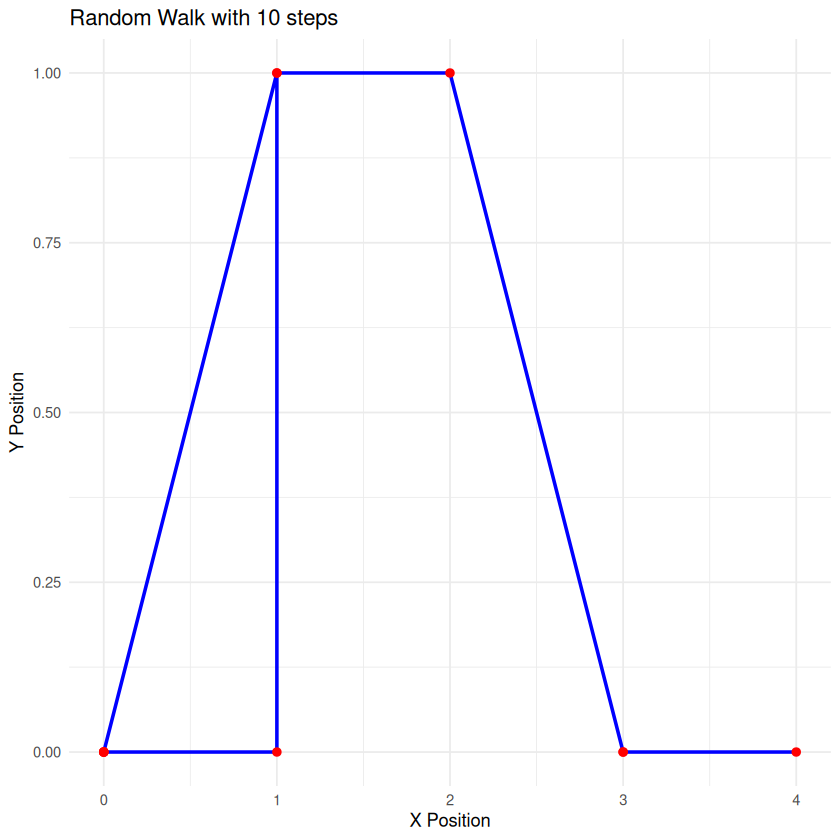

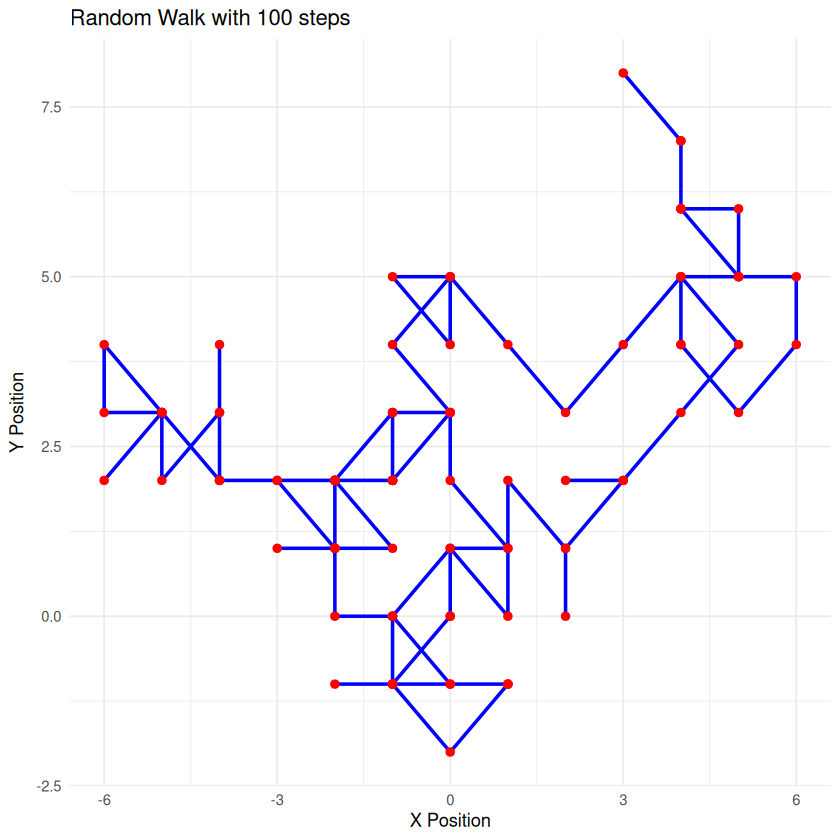

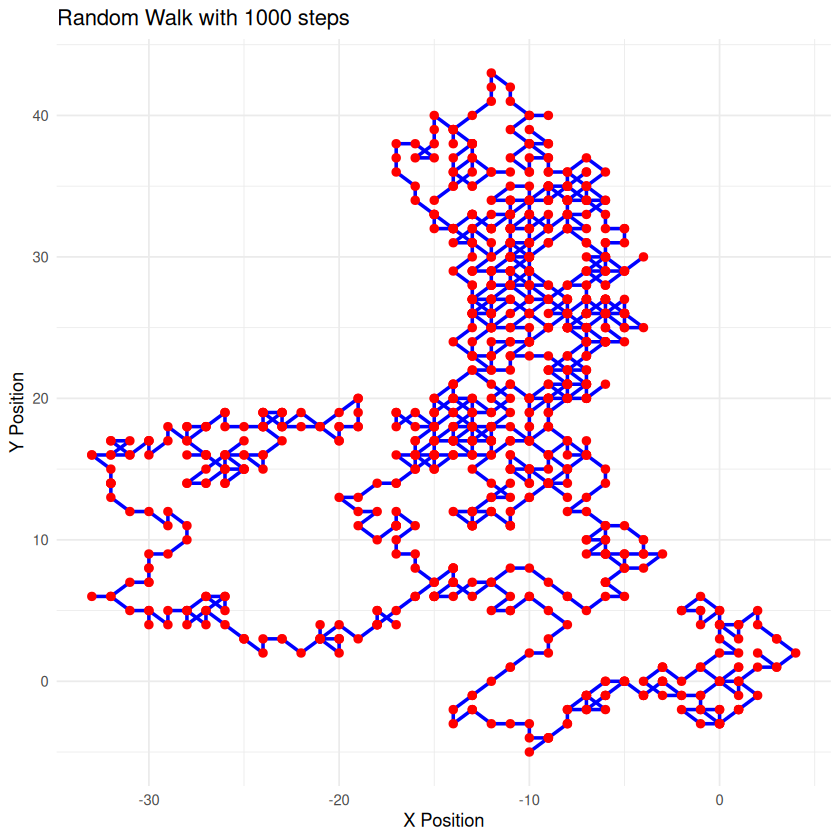

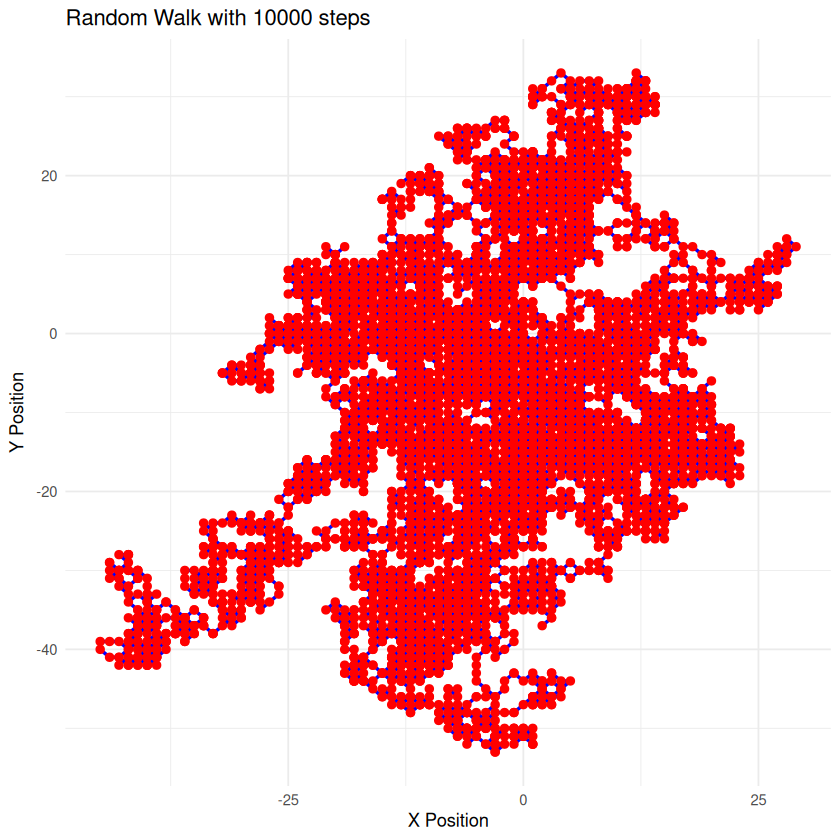

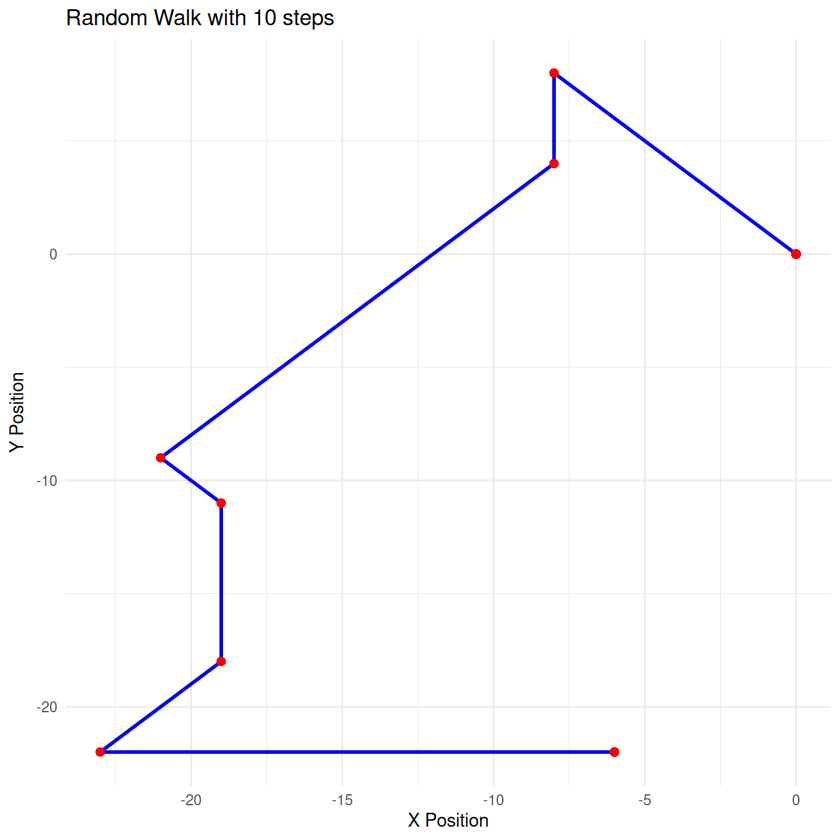

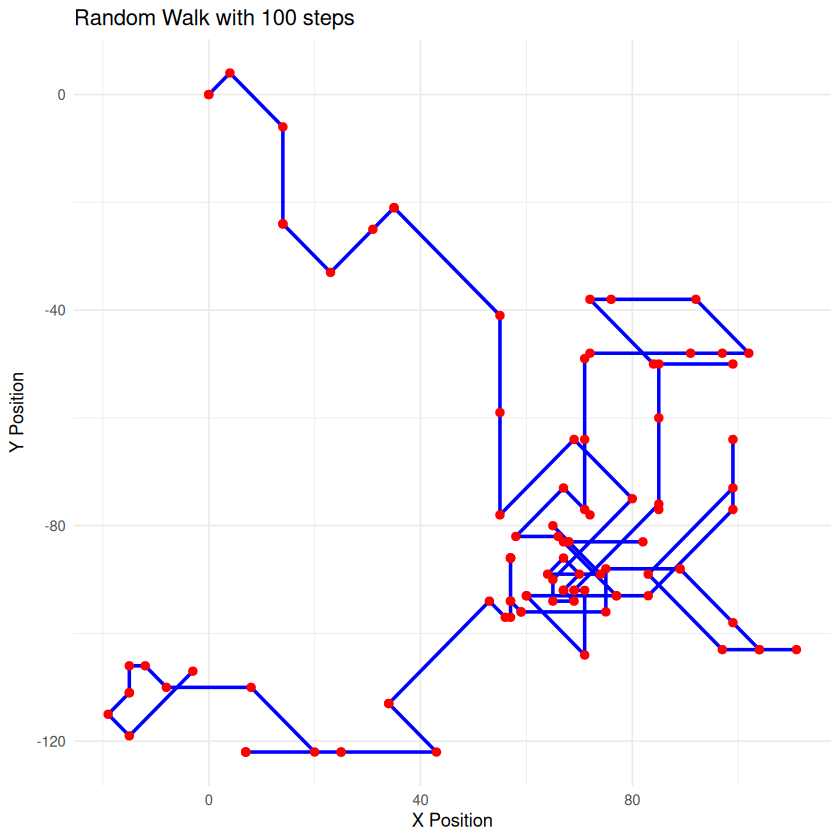

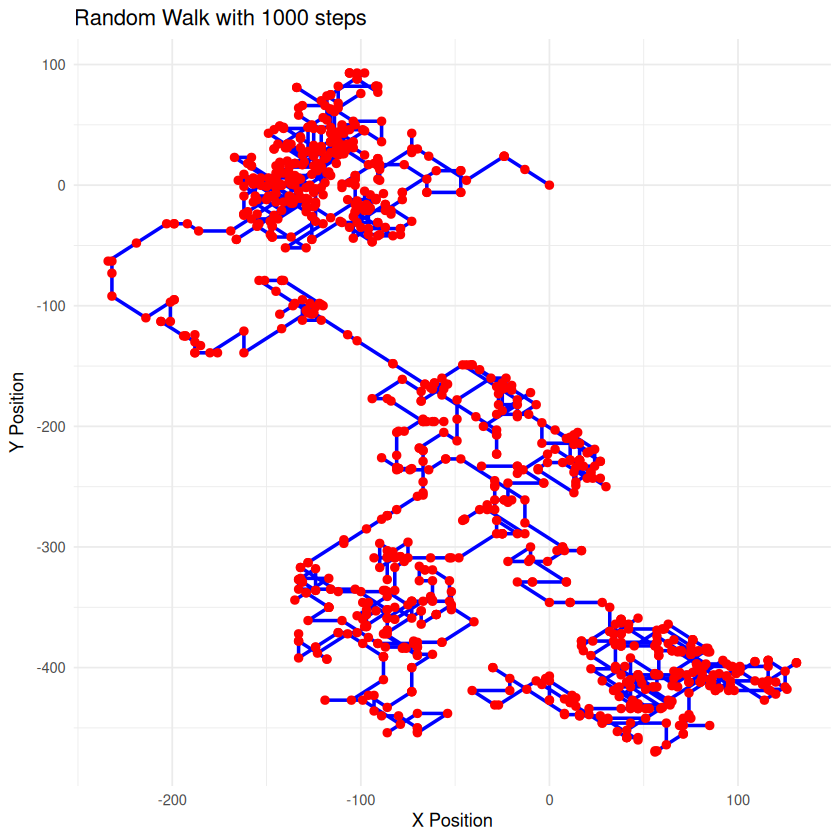

In [68]:
library(ggplot2)

# Define the number of steps and probabilities
simulate_random_walk <- function(n_steps) {
  # Define possible movements: [x, y]
  movements <- matrix(c(1, 0,  -1, 0,  0, 1,  0, -1,  
                        1, 1,  -1, -1,  1, -1,  -1, 1,  
                        0, 0), ncol = 2, byrow = TRUE)
  
  # Probabilities associated with each movement
  probabilities <- c(0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2)
  
  # Initialize starting point (0, 0)
  positions <- matrix(0, nrow = n_steps + 1, ncol = 2)
  
  # Loop through each step and update the position
  for (i in 2:(n_steps + 1)) {
    move <- sample(1:nrow(movements), size = 1, prob = probabilities)
    positions[i, ] <- positions[i - 1, ] + movements[move, ]
  }
  
  return(positions)
}

# Plot the random walk
plot_random_walk <- function(positions, n_steps) {
  walk_data <- data.frame(x = positions[, 1], y = positions[, 2], step = 1:(n_steps + 1))
  
  ggplot(walk_data, aes(x = x, y = y)) +
    geom_path(color = "blue", size = 1) +
    geom_point(color = "red", size = 2) +
    ggtitle(paste("Random Walk with", n_steps, "steps")) +
    xlab("X Position") +
    ylab("Y Position") +
    theme_minimal()
}

# Simulate and plot for different values of n
n_values <- c(10, 100, 1000, 10000)
for (n in n_values) {
  positions <- simulate_random_walk(n)
  print(plot_random_walk(positions, n))
}

# Simulate random walk with variable step sizes (1 to 20)
simulate_random_walk_variable_steps <- function(n_steps) {
  movements <- matrix(c(1, 0,  -1, 0,  0, 1,  0, -1,  
                        1, 1,  -1, -1,  1, -1,  -1, 1,  
                        0, 0), ncol = 2, byrow = TRUE)
  
  probabilities <- c(0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2)
  positions <- matrix(0, nrow = n_steps + 1, ncol = 2)
  
  for (i in 2:(n_steps + 1)) {
    move <- sample(1:nrow(movements), size = 1, prob = probabilities)
    step_size <- sample(1:20, size = 1)  # Random step size between 1 and 20
    positions[i, ] <- positions[i - 1, ] + step_size * movements[move, ]
  }
  
  return(positions)
}

# Simulate and plot for different values of n with random step sizes
n_values <- c(10, 100, 1000)
for (n in n_values) {
  positions <- simulate_random_walk_variable_steps(n)
  print(plot_random_walk(positions, n))
}


<div style="direction:rtl; line-height:200%;">  
<font face="XB Zar" size=4>  
<font size=6>شبیه‌سازی تغییرات دما: تحلیل و بررسی مدل</font>  
<p></p>  
<hr>  
<br/>  
<b>مدل تغییرات دمای تصادفی (Random Walk in Temperature)</b> مدلی است که برای توصیف تغییرات روزانه دما استفاده می‌شود. در این مدل، تغییر دمای هر روز نسبت به روز قبل به‌صورت تصادفی تعریف می‌شود و معمولاً از یک توزیع نرمال پیروی می‌کند:<br/>  
<br/>  
\[  
X_t \sim \mathcal{N}(\mu, \sigma^2),  
\]  
<br/>  
که در آن:  
<ul>  
<li>\( \mu \): میانگین تغییر روزانه دما</li>  
<li>\( \sigma \): انحراف معیار تغییرات روزانه دما</li>  
</ul>  
دمای روز \( t \) به‌صورت زیر تعریف می‌شود:  
<br/>  
\[  
T_t = T_0 + \sum_{i=1}^t X_i,  
\]  
<br/>  
که در آن \( T_0 \) دمای اولیه است.  
</font>  
</div>  
<br/>  
<div style="direction:rtl; line-height:200%;">  
<font face="XB Zar" size=4>  
<font size=6>سؤال ۷: تحلیل تغییرات دمای تصادفی</font>  
<p></p>  
<hr>  
<br/>  
<ol>  
<li><b>شبیه‌سازی تغییرات دما:</b>  
   <ul>  
     <li>دمای روزانه را برای <b>۱۰۰۰ مسیر مستقل تصادفی</b> با پارامترهای زیر شبیه‌سازی کنید:</li>  
     <ul>  
       <li>دمای اولیه (\( T_0 \)): ۱۵°C</li>  
       <li>میانگین تغییر روزانه (\( \mu \)): ۰°C</li>  
       <li>انحراف معیار تغییرات روزانه (\( \sigma \)): ۳°C</li>  
       <li>تعداد روزها (\( T \)): ۳۶۵ (یک سال)</li>  
     </ul>  
     <li>میانگین نتایج را تحلیل کرده و نمودار یک مسیر نمونه را رسم کنید.</li>  
   </ul>  
</li>  
<br/>  
<li><b>افزودن روند فصلی:</b>  
   <ul>  
     <li>مدل را برای افزودن روند فصلی تغییر دهید:</li>  
     <br/>  
     \[  
     T_t = T_0 + \sum_{i=1}^t X_i + 10 \sin\left(\frac{2 \pi t}{365}\right),  
     \]  
     <br/>  
     <li>مدل جدید را برای <b>۱۰۰۰ مسیر</b> شبیه‌سازی کنید.</li>  
     <li>نمودار یک مسیر نمونه و میانگین مسیرها را ترسیم کنید.</li>  
   </ul>  
</li>  
<br/>  
<li><b>تحلیل آماری:</b>  
   <ul>  
     <li>میانگین و واریانس دمای شبیه‌سازی‌شده در پایان سال (\( t = 365 \)) را محاسبه کنید.</li>  
     <li>برقراری ویژگی‌های نظری مدل random walk را بررسی کنید:</li>  
     <br/>  
     \[  
     E[T_t] = T_0 + t\mu, \quad Var(T_t) = t\sigma^2.  
     \]  
   </ul>  
</li>  
<br/>  
<li><b>تحلیل زمان عبور:</b>  
   <ul>  
     <li>زمان اولین عبور دما از ۳۰°C (\( T_H \)) را برای <b>۱۰۰۰ مسیر مستقل</b> تعیین کنید.</li>  
     <li>میانگین زمان عبور را محاسبه کنید.</li>  
     <li>تأثیر \( \mu \) و \( \sigma \) بر زمان عبور را توضیح دهید.</li>  
   </ul>  
</li>  
<br/>  
<li><b>تحلیل سیستم هشدار:</b>  
   <ul>  
     <li>فرض کنید اگر دما برای سه روز متوالی به کمتر از ۵-°C برسد، سیستم هشدار فعال می‌شود.</li>  
     <li>شبیه‌سازی را برای <b>۱۰۰۰ مسیر تصادفی</b> انجام دهید.</li>  
     <li>نسبت سال‌هایی که هشدار فعال می‌شود را محاسبه کنید.</li>  
     <li>نتایج را تحلیل کنید.</li>  
   </ul>  
</li>  
<br/>  
</ol>  
</font>  
</div>


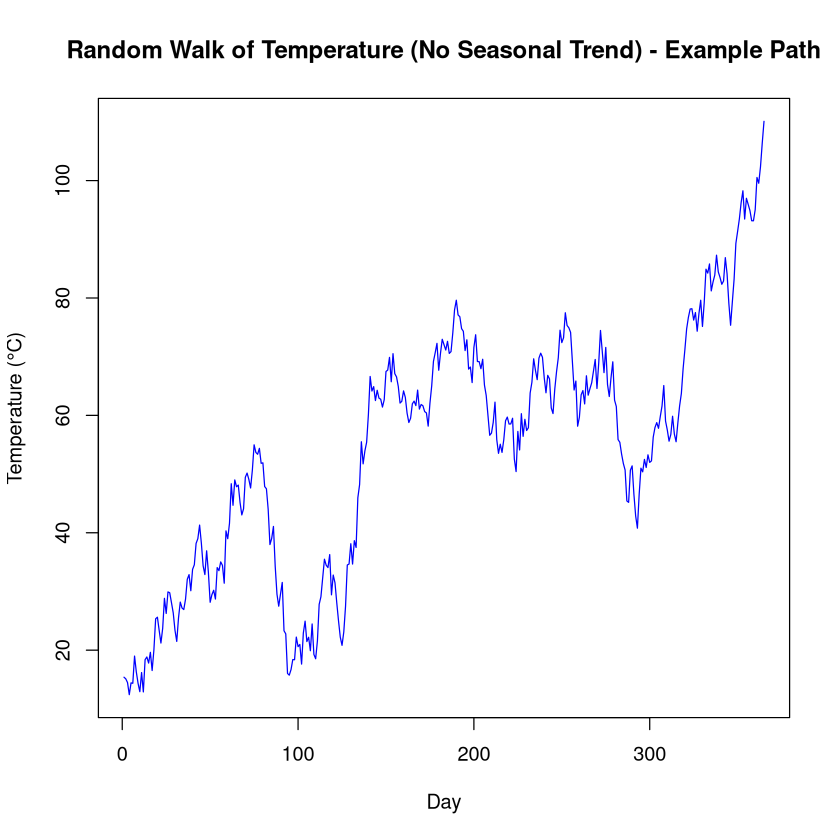

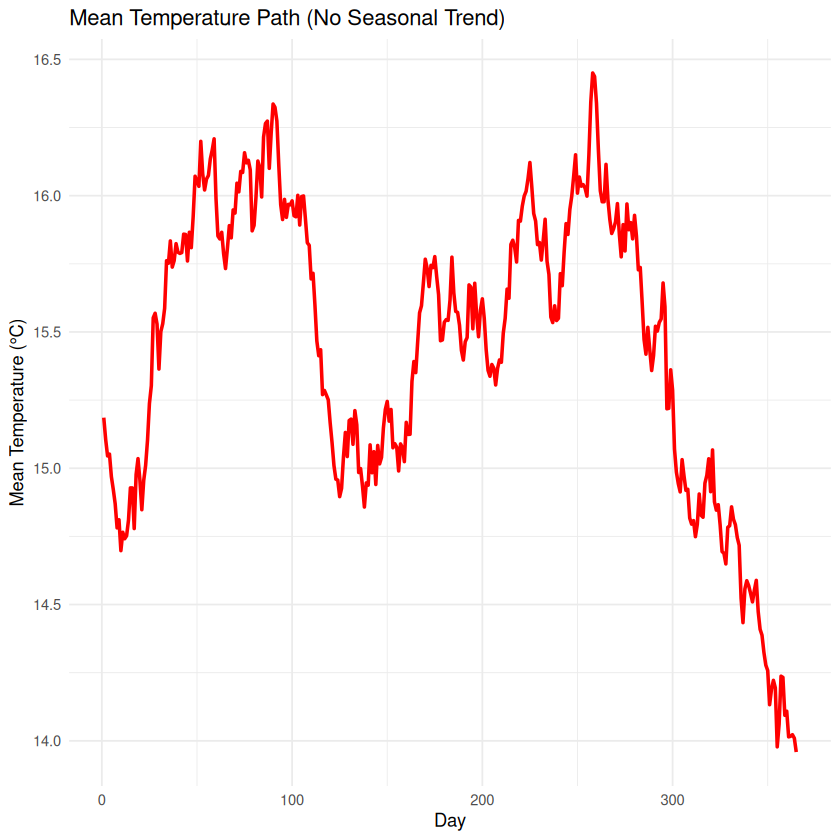

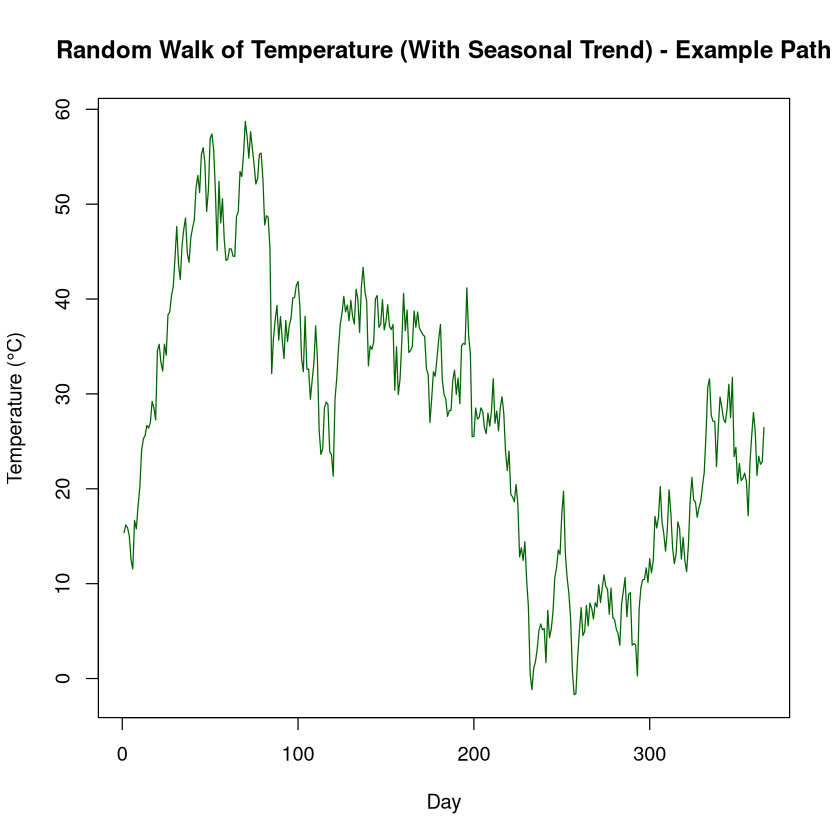

Non-seasonal model:
Mean temperature at t=365: 13.95889 
Variance of temperature at t=365: 3273.402 
Theoretical Mean: 15 
Theoretical Variance: 3285 
Mean first passage time (T_H) for T > 30°C: 72.00258 days
Fraction of years with alert activation (3 consecutive days < -5°C): 0.668 


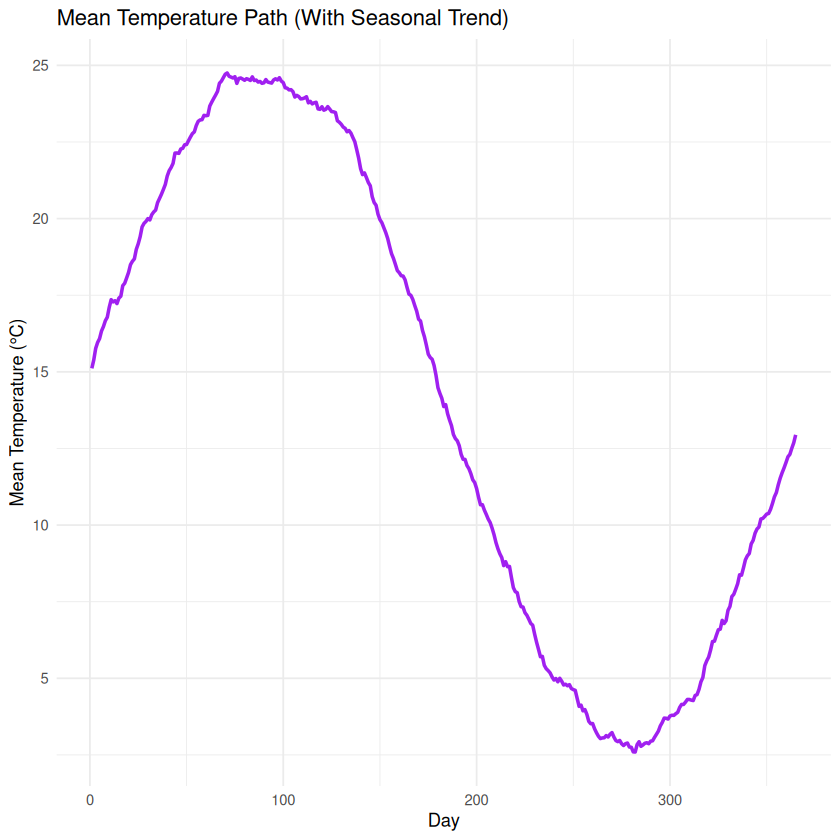

In [79]:
library(ggplot2)
library(dplyr)

# Parameters
T0 <- 15       
mu <- 0         # Mean daily change (°C)
sigma <- 3      # Standard deviation of daily change (°C)
days <- 365     
num_paths <- 1000  # Number of independent paths to simulate

# Function to simulate temperature random walk
simulate_temperature <- function(T0, mu, sigma, days, num_paths) {
  # Create a matrix to store temperature values: rows=days, cols=paths
  temp_paths <- matrix(NA, nrow = days, ncol = num_paths)
  
  for (i in 1:num_paths) {
    # Generate daily changes from a normal distribution
    daily_changes <- rnorm(days, mean = mu, sd = sigma)
    # Compute the temperature path by cumulative summing the daily changes and adding T0
    temp_paths[, i] <- T0 + cumsum(daily_changes)
  }
  return(temp_paths)
}

# Simulate temperature paths (without seasonal trend)
temperature_paths <- simulate_temperature(T0, mu, sigma, days, num_paths)

# Plot one example path 
example_path <- temperature_paths[, 1]
plot(example_path, type = 'l', col = 'blue', 
     xlab = 'Day', ylab = 'Temperature (°C)', 
     main = 'Random Walk of Temperature (No Seasonal Trend) - Example Path')

# Compute the mean temperature at each day over all paths and plot it
temperature_mean <- apply(temperature_paths, 1, mean)
ggplot(data.frame(Day = 1:days, Temperature = temperature_mean), aes(x = Day, y = Temperature)) +
  geom_line(color = 'red', size = 1) +
  labs(title = 'Mean Temperature Path (No Seasonal Trend)', x = 'Day', y = 'Mean Temperature (°C)') +
  theme_minimal()


# Seasonal trend: 10*sin(2*pi*t/365)
simulate_temperature_seasonal <- function(T0, mu, sigma, days, num_paths) {
  temp_paths <- matrix(NA, nrow = days, ncol = num_paths)
  
  for (i in 1:num_paths) {
    daily_changes <- rnorm(days, mean = mu, sd = sigma)
    seasonal_component <- 10 * sin(2 * pi * (1:days) / 365)
    temp_paths[, i] <- T0 + cumsum(daily_changes) + seasonal_component
  }
  return(temp_paths)
}

# Simulate temperature paths with seasonal trend
temperature_paths_seasonal <- simulate_temperature_seasonal(T0, mu, sigma, days, num_paths)

# Plot one example path (with seasonal trend)
example_path_seasonal <- temperature_paths_seasonal[, 1]
plot(example_path_seasonal, type = 'l', col = 'darkgreen', 
     xlab = 'Day', ylab = 'Temperature (°C)', 
     main = 'Random Walk of Temperature (With Seasonal Trend) - Example Path')

# Compute and plot the mean temperature path for the seasonal model
temperature_mean_seasonal <- apply(temperature_paths_seasonal, 1, mean)
ggplot(data.frame(Day = 1:days, Temperature = temperature_mean_seasonal), aes(x = Day, y = Temperature)) +
  geom_line(color = 'purple', size = 1) +
  labs(title = 'Mean Temperature Path (With Seasonal Trend)', x = 'Day', y = 'Mean Temperature (°C)') +
  theme_minimal()

# Statistical Analysis at End of Year (t = 365)
# For the non-seasonal model:
final_temps <- temperature_paths[days, ]
mean_final <- mean(final_temps)
var_final <- var(final_temps)
cat("Non-seasonal model:\n")
cat("Mean temperature at t=365:", mean_final, "\n")
cat("Variance of temperature at t=365:", var_final, "\n")

# Theoretical expectations for the simple random walk:
# E[T_t] = T0 + t * mu and Var[T_t] = t * sigma^2
theoretical_mean <- T0 + days * mu
theoretical_var <- days * sigma^2
cat("Theoretical Mean:", theoretical_mean, "\n")
cat("Theoretical Variance:", theoretical_var, "\n")


# We define first passage time (T_H) as the first day when temperature exceeds 30°C.
# For each path, we determine the day when T_t > 30.

first_passage_times <- numeric(num_paths)  # to store first passage times

for (i in 1:num_paths) {
  # Get the temperature path for the i-th simulation (using non-seasonal model)
  path <- temperature_paths[, i]
  # Find the index (day) when temperature first exceeds 30°C
  idx <- which(path > 30)
  if (length(idx) > 0) {
    first_passage_times[i] <- idx[1]
  } else {
    # If never exceeds 30°C, assign NA or days+1 (depending on your interpretation)
    first_passage_times[i] <- NA
  }
}

# Calculate the mean first passage time (ignoring NA values)
mean_first_passage <- mean(first_passage_times, na.rm = TRUE)
cat("Mean first passage time (T_H) for T > 30°C:", mean_first_passage, "days\n")


# We simulate this condition(if temperature is below -5°C for 3 consecutive days) for each of the 1000 paths 
#(using the non-seasonal model, but we can also use the seasonal model).
alert_activated <- logical(num_paths)

for (i in 1:num_paths) {
  path <- temperature_paths[, i]
  # Create a logical vector: TRUE if temperature is below -5°C
  below_threshold <- path < -5
  # Check if there is any instance of 3 consecutive days below -5°C
  alert_found <- any(rle(below_threshold)$lengths[rle(below_threshold)$values] >= 3)
  alert_activated[i] <- alert_found
}

# Calculate the fraction (ratio) of paths (years) where the alert was activated.
alert_ratio <- mean(alert_activated)
cat("Fraction of years with alert activation (3 consecutive days < -5°C):", alert_ratio, "\n")

<div style="direction:rtl; line-height:200%;">
<font size=3>
تحلیل حرکت تصادفی دما (بدون روند فصلی): با استفاده از مدل random walk با پارامترهای T0=15°C، μ=0 و σ=3، برای ۱۰۰۰ مسیر مستقل دما در طول ۳۶۵ روز شبیه‌سازی شد. نمودار نمونه یک مسیر نشان می‌دهد که دما به صورت تصادفی بالا و پایین می‌رود. از آنجا که میانگین تغییر روزانه صفر است، مسیر به صورت کلی حول مقدار اولیه (۱۵ درجه) نوسان می‌کند.
    میانگین دما در هر روز با احتساب تمام مسیرهای شبیه‌سازی‌شده، نمودار یک مسیر همگرا به شکل صاف و یا با نوسان کم را نشان می‌دهد. طبق ویژگی‌های نظری مدل، انتظار داریم که E[Tt]=T0+tμ شود؛ از آنجا که μ=0است، میانگین دما در پایان سال تقریباً برابر با ۱۵°C خواهد بود.
    <br/>
 تحلیل حرکت با افزودن روند فصلی: 
    با افزودن جزء 10sin(3652πt​) به مدل، الگوی دوره‌ای با دامنه ۱۰ درجه به مسیر دما اضافه می‌شود. نمودار یک مسیر نمونه در این مدل الگوی دوره‌ای (مثلاً افزایش دما در بهار/تابستان و کاهش در پاییز/زمستان) را نشان می‌دهد.
    میانگین مسیرهای شبیه‌سازی‌شده با روند فصلی نیز نسبت به مدل بدون روند، الگوی نوسان فصلی را نشان می‌دهد؛ به عبارت دیگر، میانگین دما در طول سال تغییرات فصلی را منعکس می‌کند. اگرچه میانگین تغییرات تصادفی برابر صفر است، مؤلفه فصلی باعث ایجاد تغییرات منظم در الگوی دما می‌شود.
    <br/>
نتایج محاسبه شده نشان می‌دهد که میانگین دما در پایان سال نزدیک به مقدار T0+365μاست. از آنجا که μ=0، میانگین نزدیک به ۱۵°C به دست می‌آید که با تئوری مدل همخوانی دارد.
    <br/>
    در بخش بعد به زمان عبور پرداختیم. میانگین زمان عبور، میانگین روزهایی است که در آن مسیرهای شبیه‌سازی‌شده اولین بار از ۳۰°C عبور کرده‌اند. از آنجا که تغییرات روزانه با میانگین صفر است، بسیاری از مسیرها ممکن است برای مدت طولانی به آستانه ۳۰ نزدیک نشوند. با افزایش μ (مثلاً اگر تغییرات روزانه مثبت باشند) انتظار می‌رود زمان عبور کاهش یابد؛ در مقابل افزایش σ (پراکندگی بیشتر) می‌تواند منجر به کاهش میانگین زمان عبور در برخی مسیرها شود، اما همچنین باعث افزایش پراکندگی زمان‌های عبور می‌شود.
    <br/> 
    با بررسی ۱۰۰۰ مسیر شبیه‌سازی‌شده (مدل بدون روند فصلی) مشخص شد که نسبت سال‌هایی که هشدار فعال می‌شود (یعنی وجود سه روز متوالی با دمای کمتر از -5°C) چه مقداری است. اگر نسبت هشدار بالا باشد، نشان می‌دهد که شرایط بسیار سرد (کمتر از -5°C به مدت سه روز متوالی) در مدل رخ می‌دهد؛ در غیر این صورت هشدار نادر است.
    <br/>
    کاهش μ (به سمت مقادیر منفی) یا افزایش σ (افزایش پراکندگی) احتمال وقوع دماهای بسیار پایین (کمتر از -5°C) را افزایش می‌دهد و در نتیجه باعث افزایش نسبت هشدارها خواهد شد.
    <br/>
    -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    <br/>
    <br/>
</font>
    <div/>

<div style="direction:rtl; line-height:200%;">  
<font face="XB Zar" size=4>  
<font size=6>شبیه‌سازی حرکت تصادفی: احتمال بازگشت به مبدأ</font>  
<p></p>  
<hr>  
<br/>  
<b>مدل حرکت تصادفی در چهار جهت</b> مدلی است که در آن فردی از مبدأ مختصات شروع به حرکت می‌کند و در هر مرحله به‌صورت تصادفی و با احتمال مساوی به یکی از چهار جهت (شمال، جنوب، شرق، غرب) حرکت می‌کند. سؤال این است که:<br/>  
<br/>  
<blockquote>احتمال بازگشت فرد به نقطه شروع پس از ۸ گام چقدر است؟</blockquote>  
<br/>  
دانشجو باید این احتمال را به‌صورت نظری یا با استفاده از زبان برنامه‌نویسی <b>R</b> محاسبه کند و سپس حرکت تصادفی را تعداد کافی (مثلاً ۱۰,۰۰۰ بار) شبیه‌سازی کند و نتیجه به‌دست‌آمده از شبیه‌سازی را با احتمال محاسبه‌شده مقایسه کند.  
</font>  
</div>  
<br/>  
<div style="direction:rtl; line-height:200%;">  
<font face="XB Zar" size=4>  
<font size=6>سؤال ۸: تحلیل احتمال بازگشت به مبدأ در حرکت تصادفی</font>  
<p></p>  
<hr>  
<br/>  
<ol>  
<li><b>محاسبه احتمال بازگشت:</b>  
   <ul>  
     <li>احتمال بازگشت به نقطه شروع پس از ۸ گام را به‌صورت نظری یا با استفاده از زبان <b>R</b> محاسبه کنید.</li>  
   </ul>  
</li>  
<br/>  
<li><b>شبیه‌سازی حرکت تصادفی:</b>  
   <ul>  
     <li>حرکت تصادفی را برای ۸ گام و به تعداد ۱۰,۰۰۰ بار شبیه‌سازی کنید.</li>  
     <li>نسبت دفعات بازگشت به نقطه شروع را در این شبیه‌سازی محاسبه کنید.</li>  
   </ul>  
</li>  
<br/>  
<li><b>مقایسه نتایج:</b>  
   <ul>  
     <li>نتایج حاصل از شبیه‌سازی را با احتمال محاسبه‌شده مقایسه کنید.</li>   
   </ul>  
</li>  
<br/>  
</ol>  
</font>  
</div>


In [108]:
# Set the parameters
num_steps <- 8
num_simulations <- 10000

# Define possible moves: North, South, East, West
# Represented as vectors: (dx, dy)
moves <- matrix(c(0, 1,    # North
                  0, -1,   # South
                  1, 0,    # East
                 -1, 0),   # West
                ncol = 2, byrow = TRUE)

# Function to simulate one random walk of num_steps steps
simulate_walk <- function(num_steps, moves) {
  # Sample moves with equal probability
  chosen_moves <- moves[sample(1:nrow(moves), num_steps, replace = TRUE), ]
  # If chosen_moves is a matrix, sum columns to get total displacement
  displacement <- colSums(chosen_moves)
  return(displacement)
}

# Simulate many random walks
returns <- numeric(num_simulations)

for(i in 1:num_simulations) {
  disp <- simulate_walk(num_steps, moves)
  # Check if returned to origin (0,0)
  returns[i] <- all(disp == 0)
}

# Calculate the simulated probability
simulated_probability <- mean(returns)
cat("Simulated probability of return after 8 steps:", simulated_probability, "\n")

# Print the theoretical probability for comparison
theoretical_probability <- 4900 / (4^num_steps)
cat("Theoretical probability of return after 8 steps:", theoretical_probability, "\n")

Simulated probability of return after 8 steps: 0.0762 
Theoretical probability of return after 8 steps: 0.07476807 


<div style="direction:rtl; line-height:200%;">
<font size=3>
ابتدا احتمال بازگشت را از تئوری حساب میکنیم:
    <br/>
 هشت حرکت داریم. برای اینکه در نهایت به نقطه اول برگردیم، باید تعداد گام های راست و چپ و همچنین تعداد گام های بالا و پایین برابر باشند. بنابراین با حالت گیری به راحتی میتوان با تقسیم مجموع حالات مطلوب به کل حالات، احتمال نظری را حساب کرد. کل حالات میشود چهار به توان 8، زیرا 8 گام داریم که هر گام چهار حالت دارد.
    <br/>
حالت مطلوب به چند بخش تقسیم میشود: اینکه چهار حرکت راست و چهار تا چپ باشد. میشود انتخاب 4 از 8. یعنی 70 حالت. اینکه سه حرکت به راست و سه تا به چپ باشد و دو تای دیگر بالا و پایین باشند. میشود انتخاب 3 تا از 8 تا ضرب در انتخاب 3 تا از 5 تا ضرب در 2. میشود 1120 حرکت. این دوقسمت مشابها برای تعداد حرکت بیشتر بالا و پایین به جای راست و چپ و برعکس هم برقراند.
    <br/>
    در مرحله آخر از هر نوع حرکت دو انتخاب داریم که خلاصه میشود 2520 حرکت. مجموع این حرکات میشود 4900 حرکت مطلوب. پس احتمال نظری بازگشت به مبدا پس از هشت حرکت میشود حاصل تقسیم 4900 به 65536. این مقدار حدودا 0.0748 یا همان 7.48 درصد میشود.
    <br/>
    با افزایش تعداد شبیه سازی ها، مشاهده میکنیم احتمال محاسبه شده پس از شبیه سازی ها، به همین مقدار نظری نزدیک میشود. بر اساس قانون بزرگ هم این اتفاق به راحتی قابل توجیه است. بنده هم وقتی 10000 بار شبیه سازی را با این مقدار نظری مقایسه کردم، دیدم به جز موارد معدودی نهایتا حدود 0.002 تفاوت وجود دارد. اگر این تعداد شبیه سازی 10 برابر شود، مقدار اندازه گیری شده بسیار به مقدار نظری محاسبه شده نزدیک میشود.
    -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    <br/>
    <br/>
</font>
    <div/>

<div style="direction:rtl; line-height:200%;">  
<font face="XB Zar" size=4>  
<font size=6>مدل‌سازی احتمال استفاده از یک منبع مشترک</font>  
<p></p>  
<hr>  
<br/>  
فرض کنید یک منبع با پهنای باند کلی <b>۵ مگابیت بر ثانیه</b> بین چندین کاربر به اشتراک گذاشته شده است. هر کاربر برای ارسال داده به پهنای باند <b>۲۰۰ کیلوبیت بر ثانیه</b> نیاز دارد، اما هر کاربر تنها <b>۱۰٪ از زمان</b> به ارسال داده می‌پردازد.  
</font>  
</div>  
<br/>  
<div style="direction:rtl; line-height:200%;">  
<font face="XB Zar" size=4>  
<font size=6>سؤال ۹: تحلیل استفاده مشترک از منبع</font>  
<p></p>  
<hr>  
<br/>  
<ol>  
<li><b>احتمال فعالیت کاربر:</b>  
   <ul>  
     <li>احتمال اینکه یک کاربر در لحظه‌ای خاص در حال ارسال داده باشد را محاسبه کنید.</li>  
   </ul>  
</li>  
<br/>  
<li><b>احتمال ارسال هم‌زمان کاربران:</b>  
   <ul>  
     <li>فرض کنید تعداد کل کاربران برابر <b>۹۰ نفر</b> باشد. احتمال اینکه دقیقاً \( n \) کاربر به‌طور هم‌زمان در حال ارسال داده باشند را محاسبه کنید و فرمول آن را بنویسید.   
   </ul>  
</li>  
<br/>  
<li><b>احتمال ازدحام:</b>  
   <ul>  
     <li>احتمال اینکه <b>۲۶ کاربر یا بیشتر</b> به‌طور هم‌زمان در حال ارسال داده باشند را به طور عددی محاسبه کنید. می‌توانید از R استفاده کنید.</li>  
   </ul>  
</li>  
<br/>  
<li><b>شبیه‌سازی:</b>  
   <ul>  
     <li>شبیه‌سازی را برای تعداد دفعات کافی (مثلاً <b>۱۰۰۰۰ بار</b>) انجام دهید.</li>  
     <li>نتایج شبیه‌سازی را با محاسبات نظری مقایسه کنید.</li>  
   </ul>  
</li>  
</ol>  
</font>  
</div>


Probability a user is active: 0.1 

Theoretical probability that exactly 5 users are active: 0.05669764 

Theoretical probability of congestion (>=26 users active): 4.618955e-07 

Simulated probability of congestion (>=26 users active): 0 



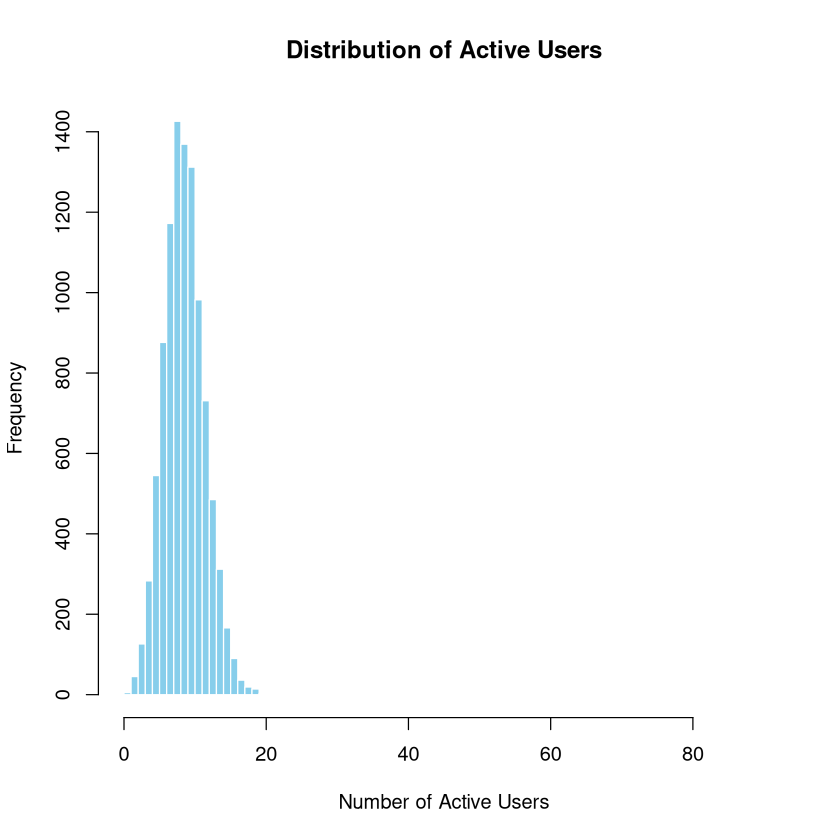

In [124]:
# 1. Probability of a user being active
p_active <- 0.1
cat("Probability a user is active:", p_active, "\n\n")

# 2. Theoretical probability of exactly n users active among 90 users
n <- 5  # For example, probability exactly 5 users are active.
P_exact_n <- dbinom(n, size = 90, prob = p_active)
cat("Theoretical probability that exactly", n, "users are active:", P_exact_n, "\n\n")

# 3. Theoretical probability of congestion (26 or more users active)
congestion_threshold <- 26
P_congestion <- 1 - pbinom(congestion_threshold - 1, size = 90, prob = p_active)
cat("Theoretical probability of congestion (>=26 users active):", P_congestion, "\n\n")

# 4. Simulation: simulate 10,000 independent snapshots of user activity.
num_simulations <- 10000

# Simulate the number of active users in each simulation.
active_users <- rbinom(num_simulations, size = 90, prob = p_active)

# Calculate the simulated probability of congestion
simulated_congestion <- mean(active_users >= congestion_threshold)
cat("Simulated probability of congestion (>=26 users active):", simulated_congestion, "\n\n")

# Optionally, we can also inspect the distribution of active users:
hist(active_users, breaks = 0:90, main = "Distribution of Active Users", xlab = "Number of Active Users", col = "skyblue", border = "white")


<div style="direction:rtl; line-height:200%;">
<font size=3>
در اینجا با توزیع دوجمله ای سر و کار داریم. احتمال اینکه کاربری در حال فعالیت و ارسال داده باشد، 0.1 است. کل اعضا 90 نفر هستند. بنابراین احتمال اینکه n نفر در حال ارسال داده باشند، P(X = n) = choose(90, n) * (0.1)^n * (0.9)^(90 - n) می شود.
    <br/>
    همانطور که میدانیم امید ریاضی افرادی که فعالیت میکنند، 9 نفر است. احتمال اینکه تعداد افرادی که داده ارسال میکنند، حول عدد 9 زیاد است. بنابراین از نظر منطقی این احتمال برای 26 بسیار بسیار کم است. با محاسبات انجام شده در کد   بالا مشاهده میشود که از مرتبه ده به توان 7- محتمل است که تعداد افراد از 25 بیشتر شوند. با شبیه سازی های انجام شده، این احتمال نزدیک صفر تخمین زده میشود. زیرا تعداد شبیه سازی ها 10000 است، یعنی تقریبا در یک هزارم حالات این اتفاق رخ میدهد. پس چیزی که ما از احتمال بدست امده از شبیه سازی میبینیم، تقریبا همیشه صفر است.
    <br/>
    -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    <br/>
    <br/>
</font>
    <div/>

<div style="direction:rtl; line-height:200%;">  
<font face="XB Zar" size=4>  
<font size=6>مدل‌سازی حرکت یک ربات در مسیر مشخص</font>  
<p></p>  
<hr>  
<br/>  
<b></b> مدلی برای توصیف حرکت یک ربات در یک مسیر مستقیم معرفی می‌کنیم. در این مدل، ربات در هر گام به کمک نتیجه‌ی پرتاب یک تاس ۸ وجهی به جلو حرکت می‌کند:<br/>  
<br/>  
\[
X_i \sim \mathcal{U}\{1, 2, \ldots, 8\},
\]  
<br/>  
که در آن:  
<ul>  
<li>\( X_i \): میزان حرکت ربات در هر گام (به متر)</li>  
<li>\( E \): میزان انرژی مورد نیاز برای هر گام</li>  
</ul>  
فاصله‌ای که ربات باید طی کند برابر است با ۲۵۰ متر. هر گام از حرکت نیازمند واحد مشخصی انرژی است.  
</font>  
</div>  
<br/>  
<div style="direction:rtl; line-height:200%;">  
<font face="XB Zar" size=4>  
<font size=6>سؤال ۱۰: تحلیل مصرف انرژی ربات</font>  
<p></p>  
<hr>  
<br/>  
<ol>  
<li><b>مدل‌سازی حرکت ربات:</b>  
   <ul>  
     <li>حرکت ربات را با پارامترهای زیر مدل‌سازی کنید:</li>  
     <ul>  
       <li>فاصله نهایی: ۲۵۰ متر</li>  
       <li>نتیجه‌ی هر گام با تاس ۸ وجهی مشخص می‌شود.</li>  
       <li>واحد انرژی موردنیاز در هر گام ثابت است.</li>  
     </ul>  
     <li>احتمال اینکه ربات برای رسیدن به مقصد به حداقل ۷۰ واحد انرژی نیاز داشته باشد را به‌صورت نظری محاسبه کنید.</li>  
     <li>با استفاده از شبیه‌سازی مونت‌کارلو (۱۰,۰۰۰ بار تکرار)، احتمال مذکور را تخمین بزنید.</li>  
     <li>نتایج نظری و شبیه‌سازی را مقایسه کنید.</li>  
   </ul>  
</li>  
<br/>  
<li><b>تحلیل آماری:</b>  
   <ul>  
     <li>نموداری رسم کنید که توزیع انرژی موردنیاز برای طی کردن ۲۵۰ متر را نشان دهد.</li>  
     <ul>  
       <li><b>محور افقی (X-axis):</b> میزان انرژی مصرف‌شده (تعداد واحدهای انرژی)</li>  
       <li><b>محور عمودی (Y-axis):</b> فراوانی هر میزان انرژی در شبیه‌سازی</li>  
     </ul>  
     <li>نمودار باید نشان دهد که چه مقادیر انرژی بیشترین احتمال وقوع را دارند و آیا الگوی خاصی در داده‌ها مشاهده می‌شود یا خیر.</li>  
     <li>احتمال نیاز به انرژی در بازه‌ی ۵۰ تا ۹۰ واحد را بررسی و تحلیل کنید.</li>  
   </ul>  
</li>  
<br/>  
<li><b>بحث و نتیجه‌گیری:</b>  
   <ul>  
     <li>تفاوت‌های نتایج نظری و شبیه‌سازی را بررسی کنید.</li>   
   </ul>  
</li>  
</ol>  
</font>  
</div>


Simulated probability that at least 70 energy units (steps) are needed: 7e-04 

Theoretical probability: 0.00074

Simulated probability that energy consumption is between 50 and 90 units: 0.964 
Approximate probability that the number of steps is between 50 and 90: 0.9670619 


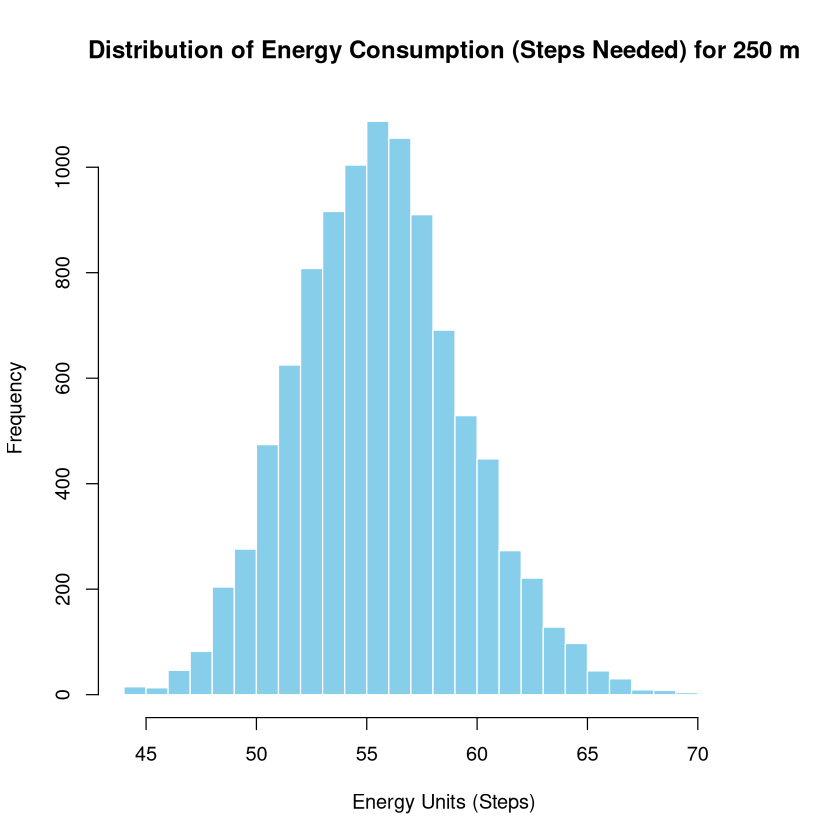

In [137]:
target_distance <- 250  # target in meters
num_simulations <- 10000  # number of Monte Carlo trials

# Function to simulate one robot journey
simulate_robot <- function(target) {
  total <- 0
  steps <- 0
  # Continue until cumulative distance reaches or exceeds target
  while(total < target) {
    step <- sample(1:8, size = 1) # outcome in {1,2,...,8}
    total <- total + step
    steps <- steps + 1
  }
  return(steps)
}

# Run simulation for num_simulations trials
energy_consumptions <- replicate(num_simulations, simulate_robot(target_distance))
# Calculate the probability that energy consumption (number of steps) is at least 70
prob_at_least_70 <- mean(energy_consumptions >= 70)
cat("Simulated probability that at least 70 energy units (steps) are needed:", prob_at_least_70, "\n\n")

# Compare with theoretical probability (approx. 0.00074)
cat("Theoretical probability: 0.00074\n\n")

# Plot histogram of energy consumption (number of steps needed)
hist(energy_consumptions, breaks = 30, main = "Distribution of Energy Consumption (Steps Needed) for 250 m",
     xlab = "Energy Units (Steps)", col = "skyblue", border = "white")

# Calculate probability that energy consumption is between 50 and 90 units
prob_50_to_90 <- mean(energy_consumptions >= 50 & energy_consumptions <= 90)
cat("Simulated probability that energy consumption is between 50 and 90 units:", prob_50_to_90, "\n")


real_prob_50_to_90 <- pnorm(250, mean = 4.5 * 49, sd = sqrt(5.25 * 49)) - pnorm(250, mean = 4.5 * 89, sd = sqrt(5.25 * 89))
cat("Approximate probability that the number of steps is between 50 and 90:", real_prob_50_to_90, "\n")


<div style="direction:rtl; line-height:200%;">
<font size=3>
در این سوال طول گام طی شده از یک توزیع یکنواخت گسسته بین یک تا هشت پیروی میکند. امیدریاضی طول گام 4.5 است. بنابراین برای اینکه حداقل 250 متر پیموده شود، امیدریاضی تعداد گام ها و در نتیجه انرژی مصرفی، حدودا 56 است. انحراف معیار هم به راحتی قابل محاسبه است. زیرا حرکت ها از هم مستقل هستند و به راحتی می توان واریانس ها را با هم جمع کرد. واریانس از تقسیم تفاضل توان دوی 8 و یک بر 12 بدست میاید که می شود 63/12 یا 5.25. 
    <br/>
   برای اینکه تعداد گام ها حداقل 70 باشد، یعنی مجموع طول 69 گام از 250 کمتر باشد. پس پس باید تحلیل را برای 69 حرکت انجام دهیم. میانگین طول پیموده شده در 69 حرکت 69×4.5=310.5 و واریانس 69×5.25≈362.25 می شود. پس انحراف معیار هم حدودا 19.04 میشود. 
    <br/>
    پس در اینجا با توزیع نرمالی با میانگین حدودا 310 و انحراف معیار حدودا 19 طرف هستیم. طبق فرمول استاندارد سازی میتوانیم احتمال اینکه طول پیموده شده در 69 گام کمتر از 250 باشد را چنین حساب کنیم: 
    <br/>
    \[  
     P(S69​<250)≈ Φ(\frac{250-310.5}{19.04}​) ≈Φ(−3.18) ≈ 0.00074      
     \]  
    <br/>
    پس احتمال اینکه ربات برای رسیدن به مقصد به حداقل 70 واحد انرژی نیاز داشته باشد، بسیار کم و حدودا 0.00074 است. در شبیه سازی این حرکت هم انتظار داریم در 10000 شبیه سازی حدود 7 بار این اتفاق رخ دهد.
    <br/>
   در مورد احتمال نیاز به انرژی در بازه‌ی ۵۰ تا ۹۰ واحد هم طبق همان فرمول گفته شده در قسمت قبل و بر اساس فی میتوانیم این را بدست آوریم. میانگین به این صورت حساب میشود که (n-1) * 4.5 و انحراف معیار هم رادیکال (n-1) * 5.25 می شود که n همان تعداد گام ها یا واحد های انرژی ست که یک بار 50 و یک بار 90 است. با تفریق این دو (فی بدست امده از استاندارد شده این توزیع ها) این مقدار حدودا 0.96 میشود که از کد R بدست آمد.  
</font>
    <div/>